In [246]:
!python --version

Python 3.11.4


In [247]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Scaling data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algos Used
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# Model Fine-tuning
from sklearn.model_selection import GridSearchCV

# To ignore warnings
warnings.filterwarnings("ignore")

In [248]:
# Loading the dataset
hm = pd.read_csv("hmeq.csv")
data = hm.copy()
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [249]:
data.shape

(5960, 13)

In [250]:
data.info

<bound method DataFrame.info of       BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0

In [251]:
# checking for missing values
data.isnull().sum() / data.shape[0] * 100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [252]:
data.shape[0]

5960

In [253]:
cols = data.select_dtypes(['object']).columns.tolist()
cols.append('BAD')
cols

['REASON', 'JOB', 'BAD']

In [254]:
for i in cols:
    data[i] = data[i].astype("category")

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


In [256]:
# Summary Statistics of the Dataset
num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
            'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

data[num_cols].describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

In [257]:
data.describe(include='category').T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

In [258]:
# checking unique values in each categorical column
cols_cat = data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in', i, 'are: ')
    print(data[i].value_counts(normalize = True))
    print('-'*40)
    

Unique values in BAD are: 
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
----------------------------------------
Unique values in REASON are: 
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
----------------------------------------
Unique values in JOB are: 
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
----------------------------------------


In [259]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,  # Number of rows of the subplot grid= 2
                                           sharex=True,  # x-axis will be shared among all subplots
                                           gridspec_kw={
                                               "height_ratios": (.25, .75)},
                                           figsize=figsize
                                           )  # creating the 2 subplots
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(np.mean(feature), color='green',
                     linestyle='--')  # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black',
                     linestyle='-')  # Add median to the histogram

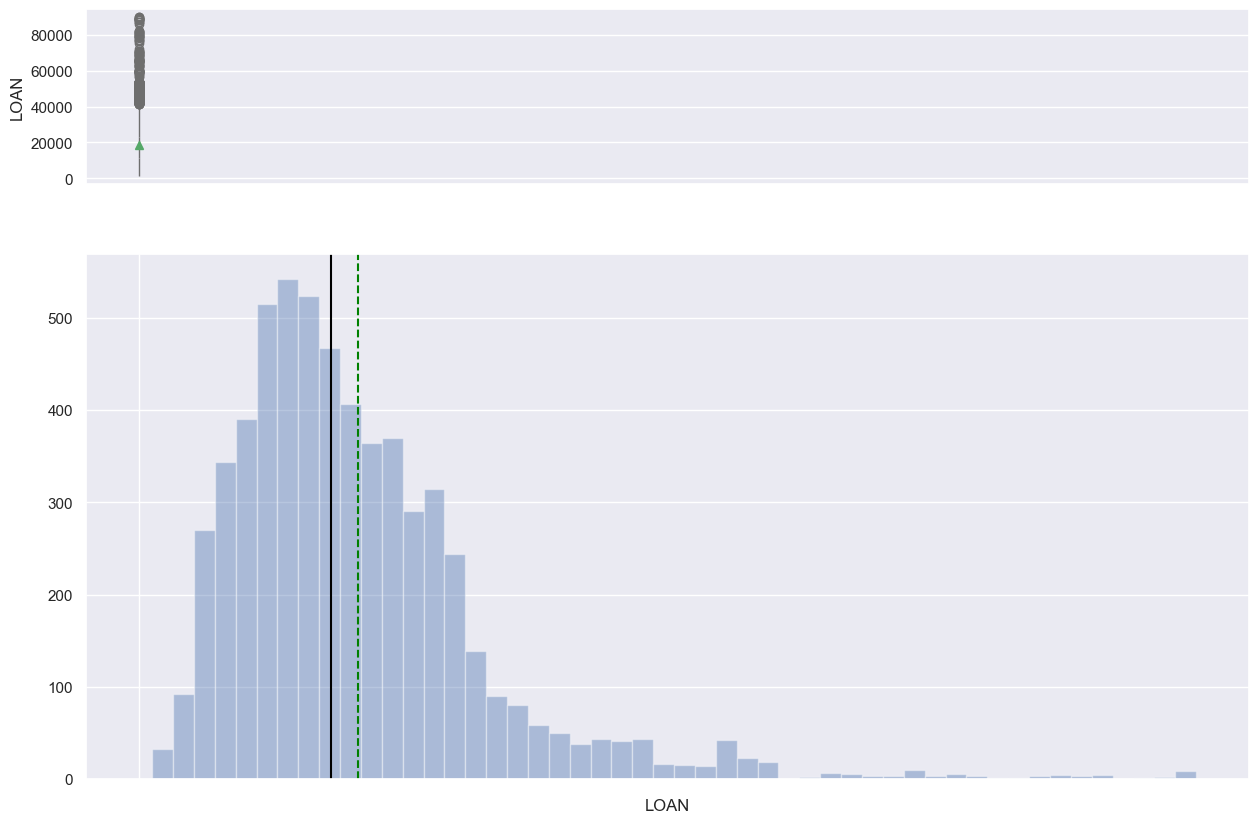

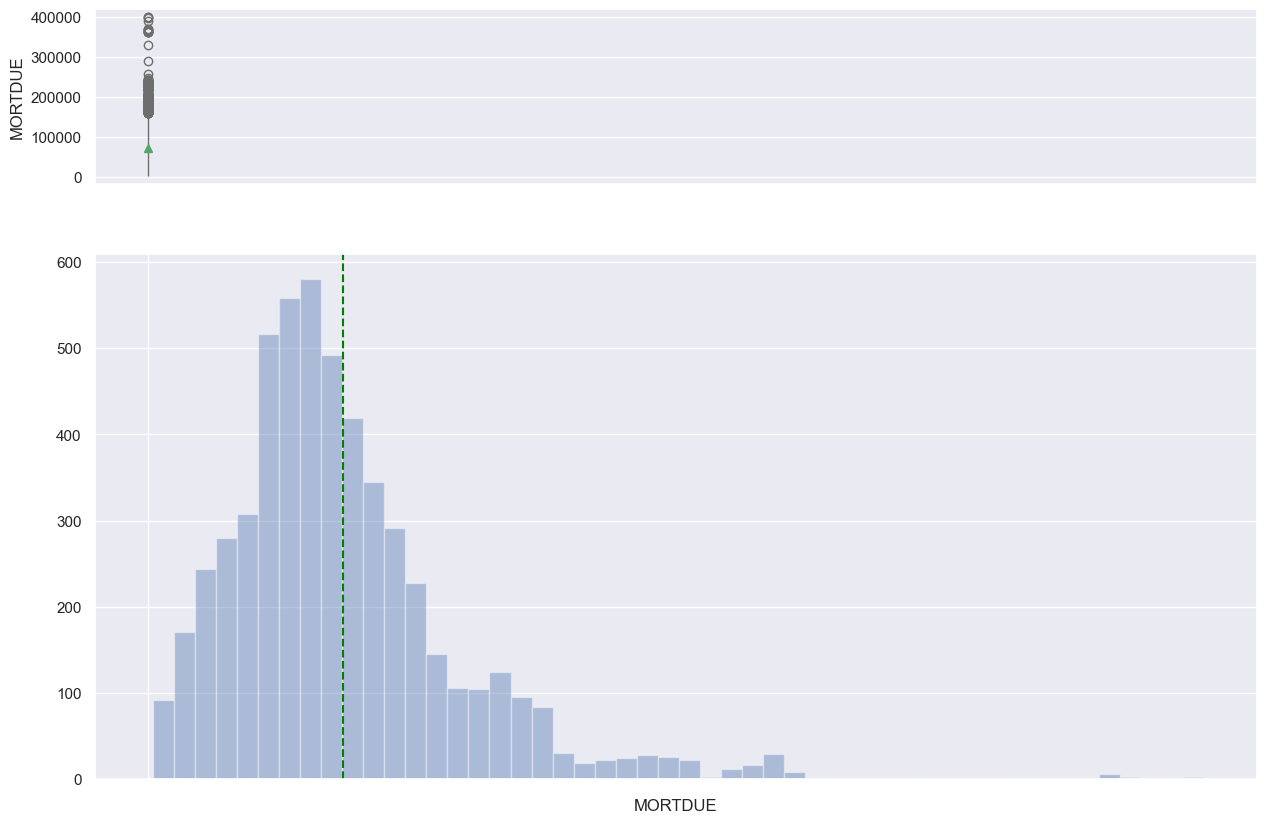

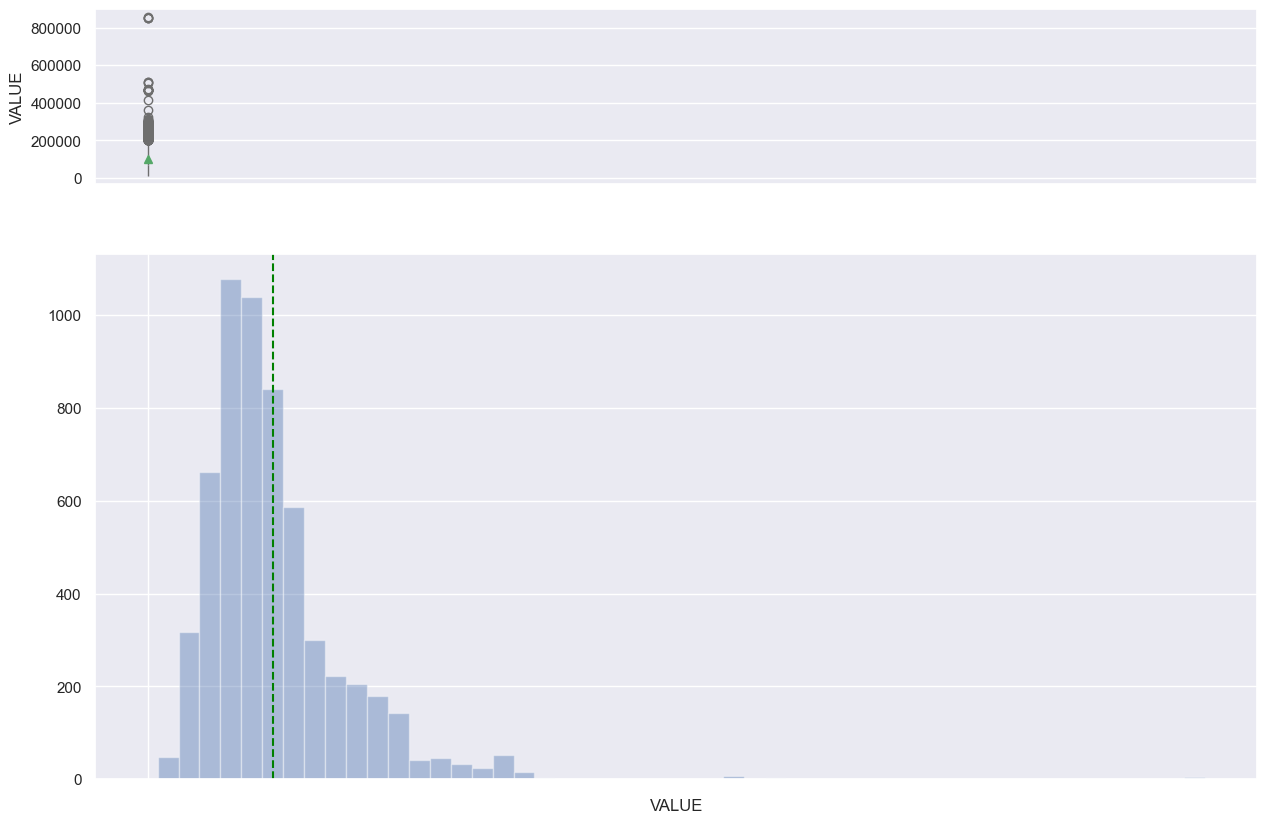

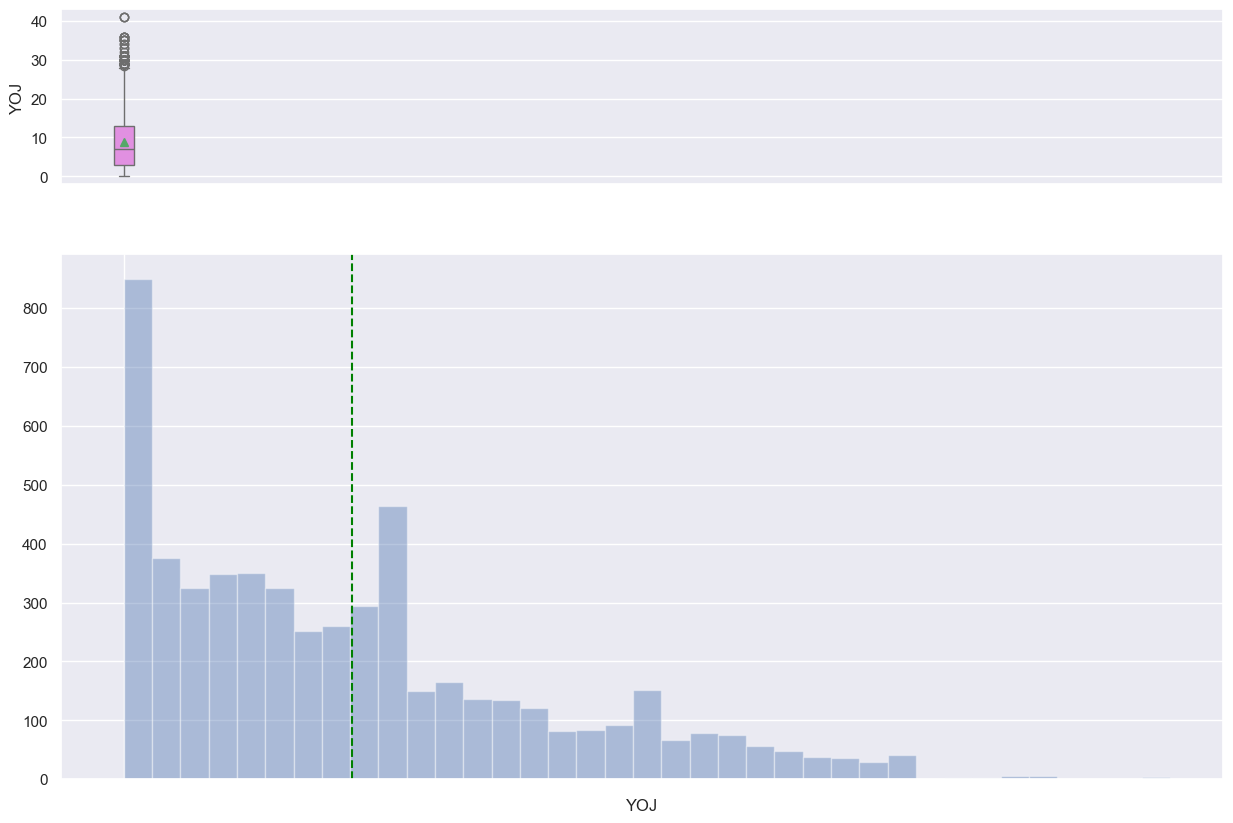

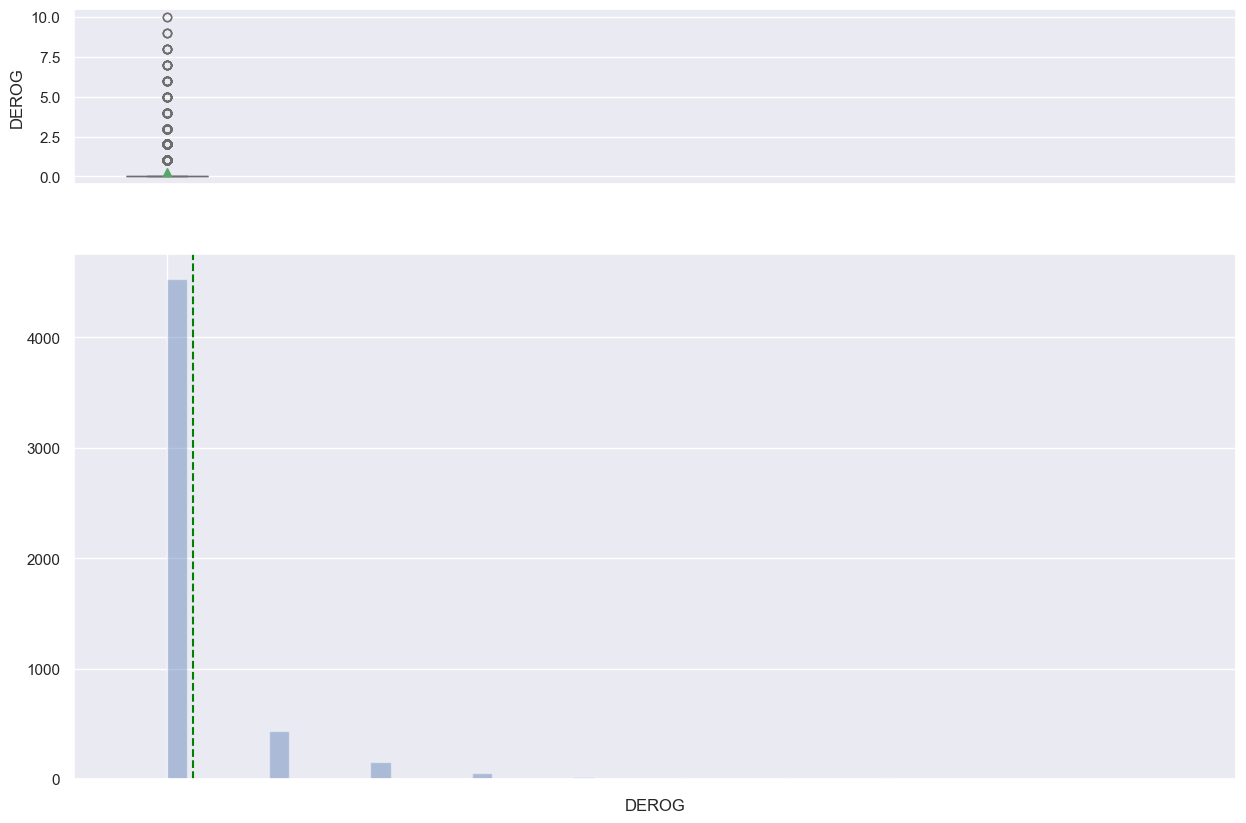

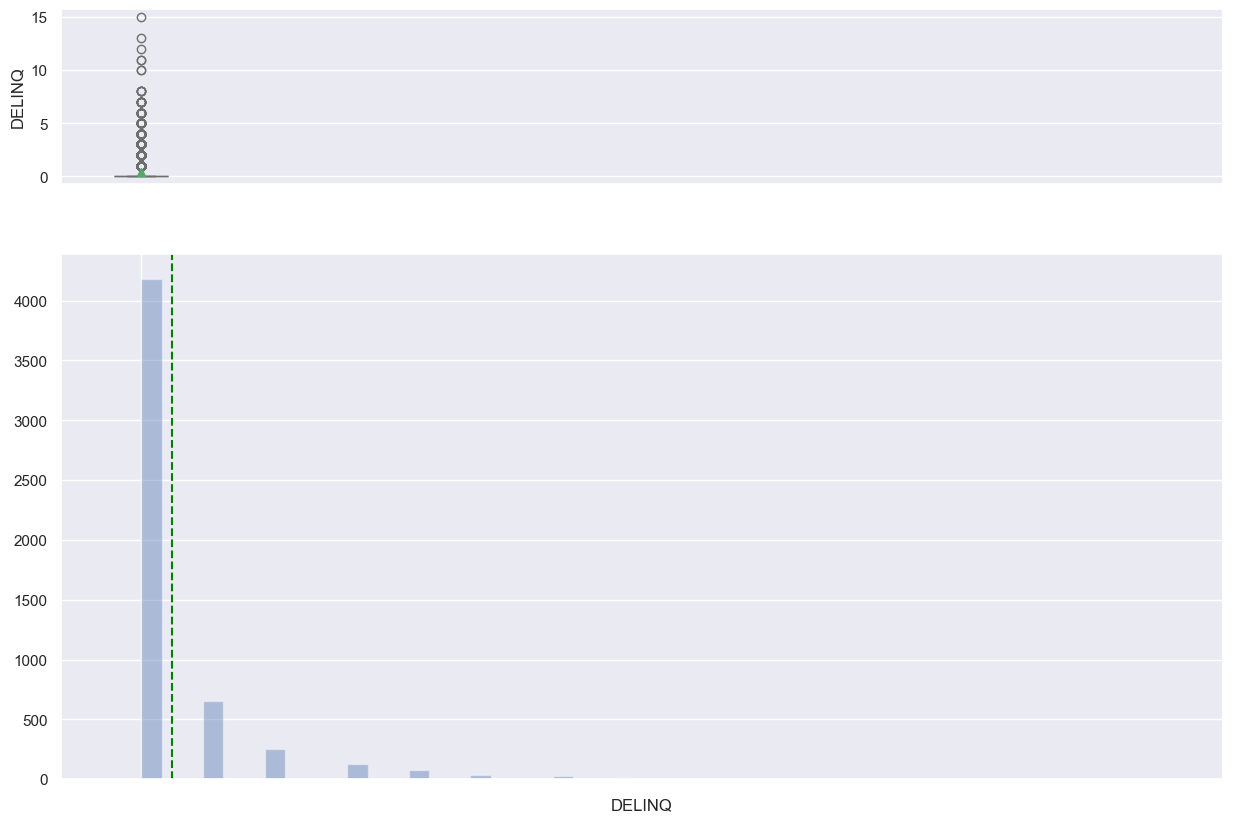

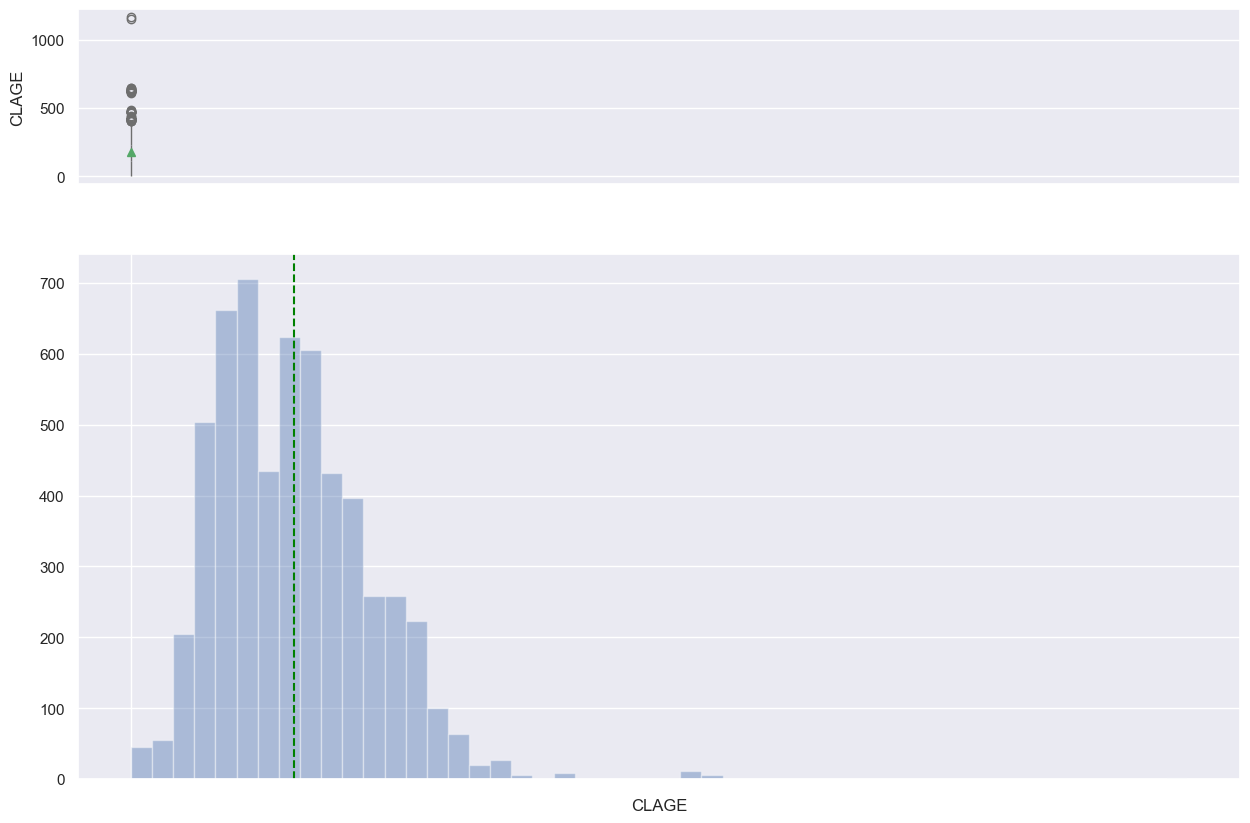

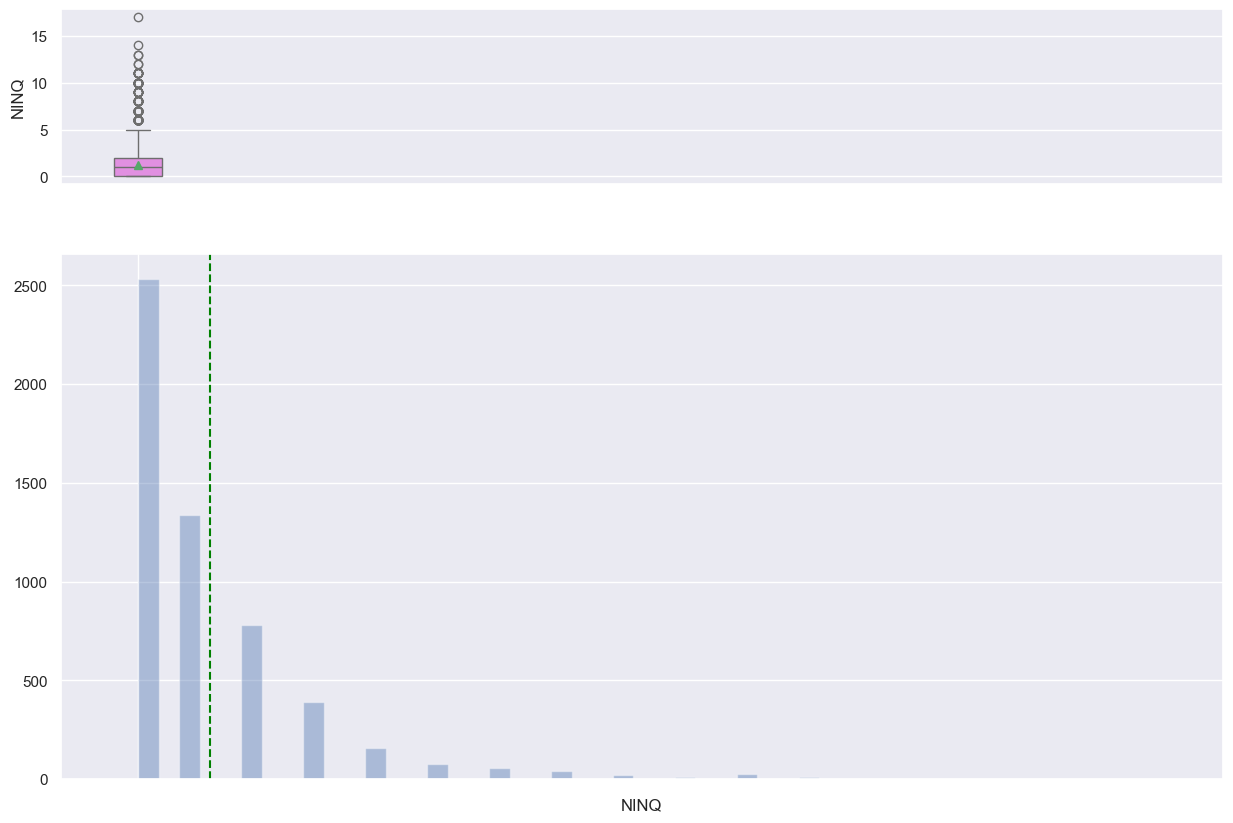

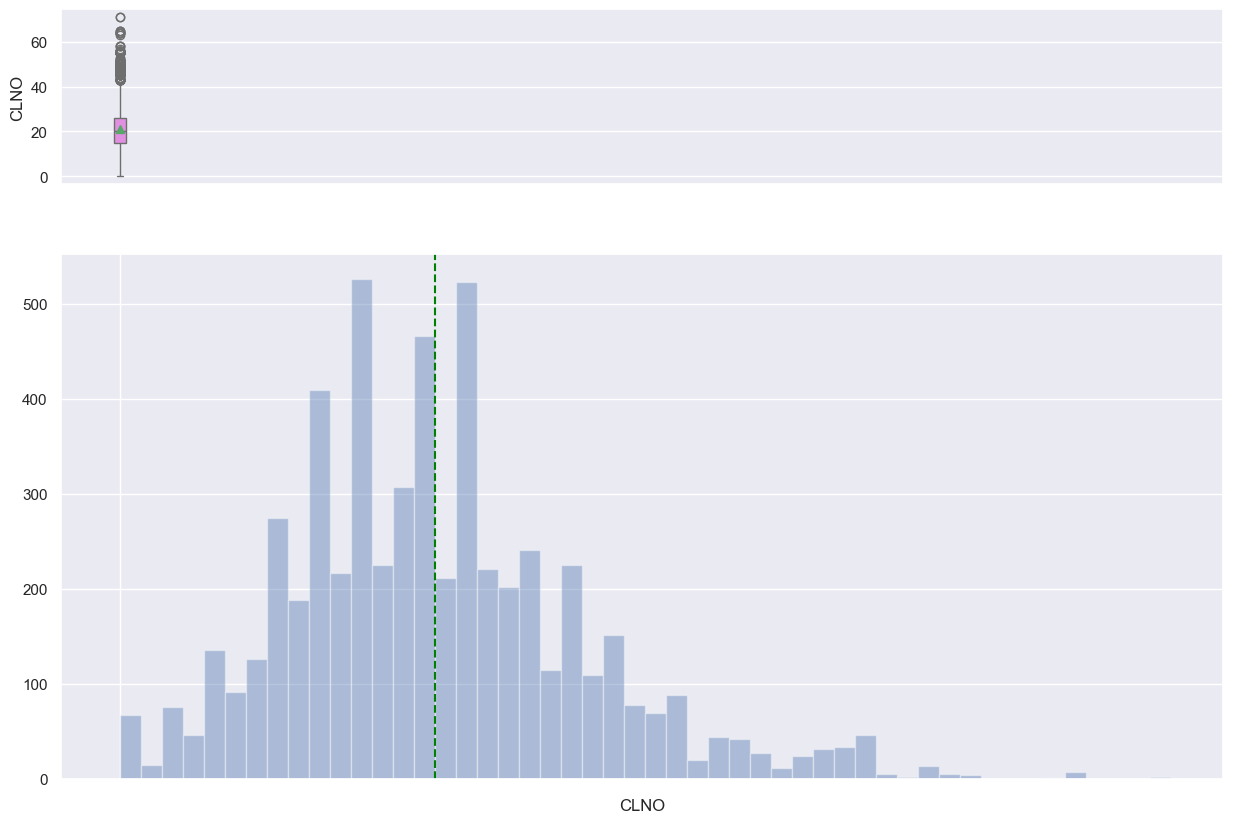

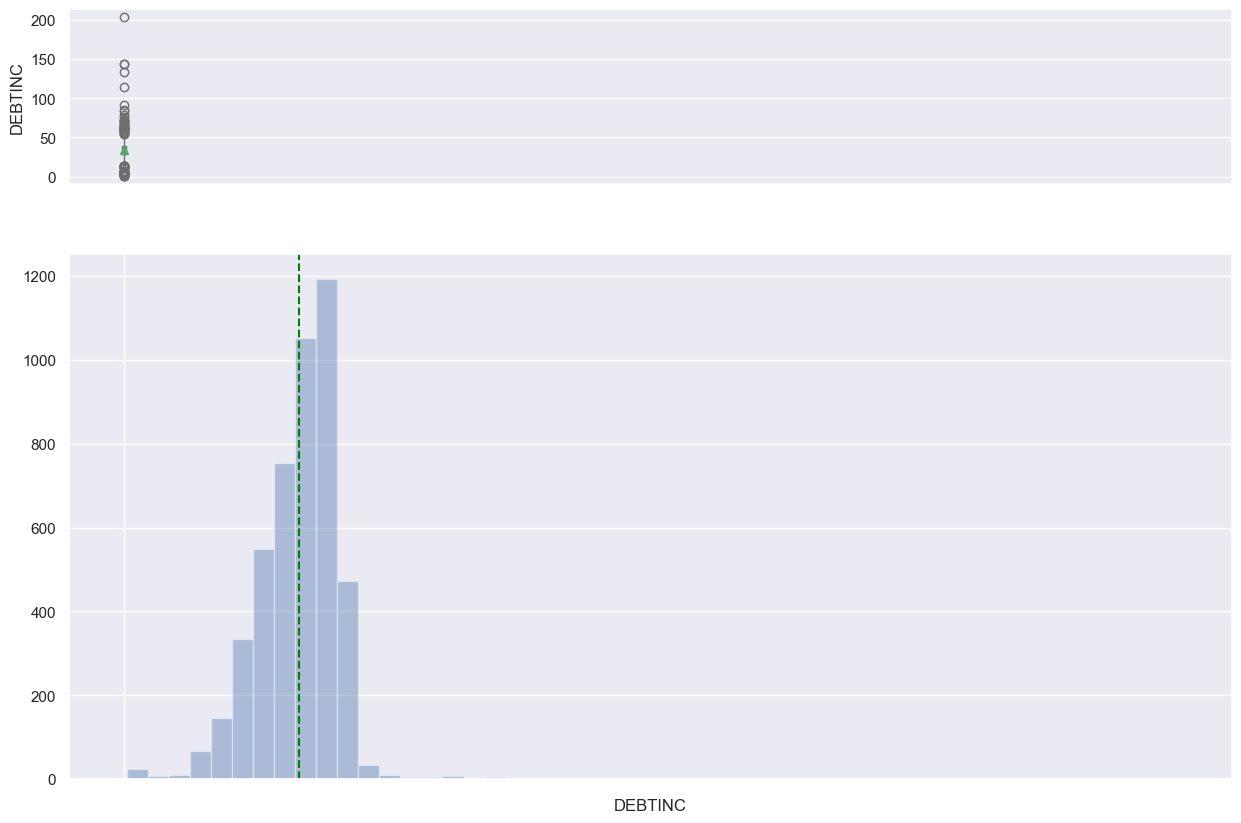

In [260]:
for i in num_cols:
    histogram_boxplot(data[i])

Insights

1. The variable LOAN has a skewed distribution to the right with lot of big outliers compared to the mean.
2. The variable MORTDUE has a skewed distribution to the right with lot of big outliers compared to the mean.
3. The variable VALUE is slightly skewed to the right with many oultiers.
4. The variable YOJ is very skewed to the right and has a few outliers.
5. The variable DEROG and DELINQ are discrete and are skewed to the right with some outliers.
6. The variable CLAGE seems to follow a distribution normally shaped with two modes.
7. The variable NINQ is skewed to the right with some outliers.
8. The variable CLNO follows a normal shape distribution slightly skewed to the right.
9. The variable DEBTINC follows a normal shape distribution with outliers at both sides.

## Univariate Analysis - Categorical Data

In [261]:
def perc_on_bar(ax, feature):
    '''
    ax: axes object of the plot
    feature: the categorical column
    '''
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y + 0.5), ha='center', size=12)

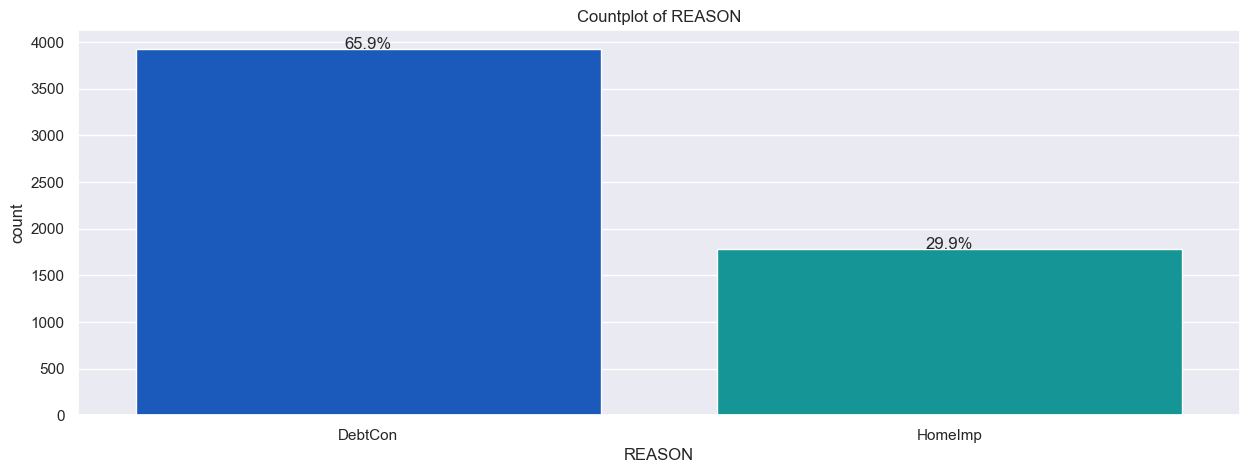

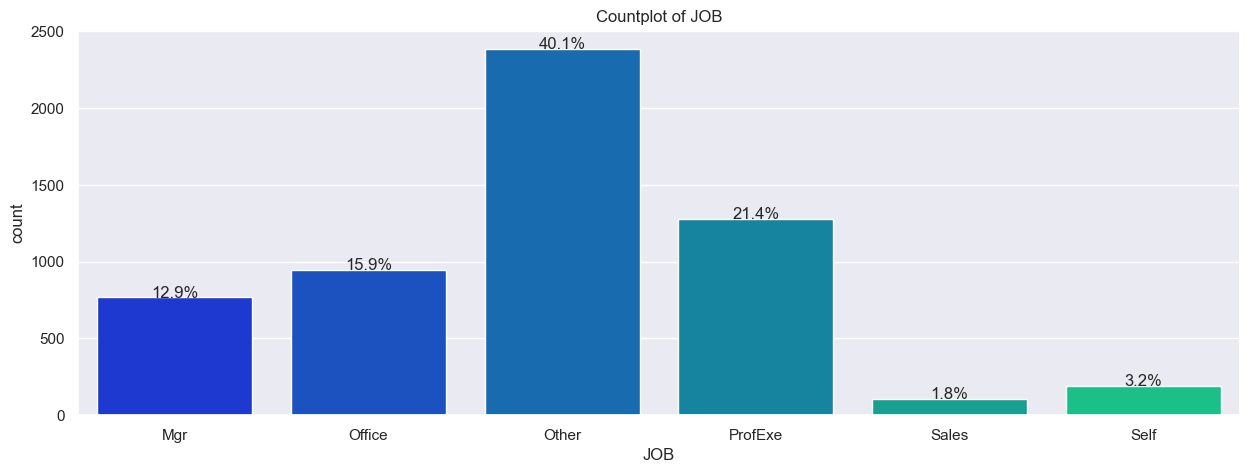

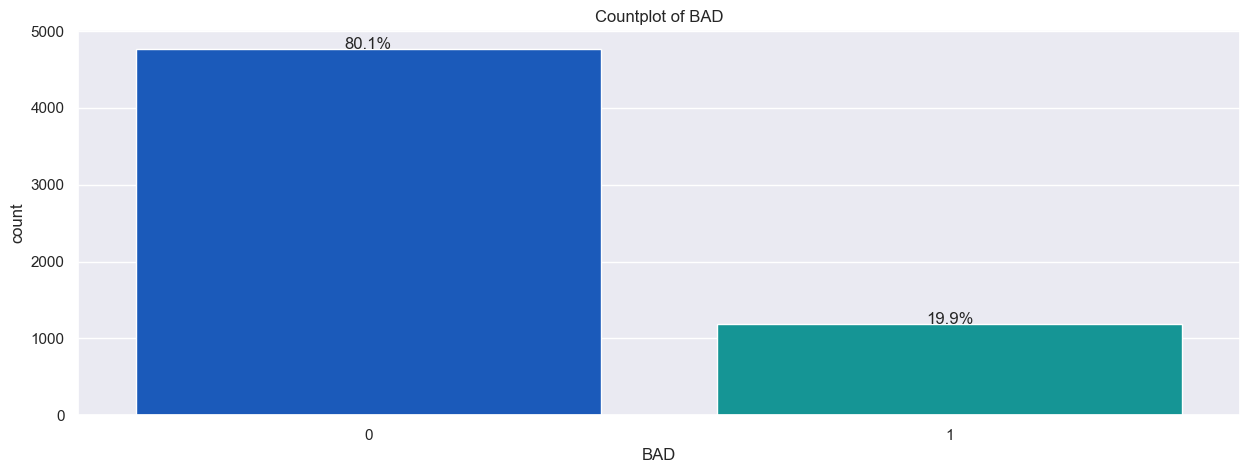

In [262]:
for i in cols:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(x=data[i], palette='winter')  # vertical bars
    perc_on_bar(ax, data[i])
    plt.title(f'Countplot of {i}')
    plt.show()

## Bivariate Analysis

<Axes: xlabel='BAD', ylabel='DEBTINC'>

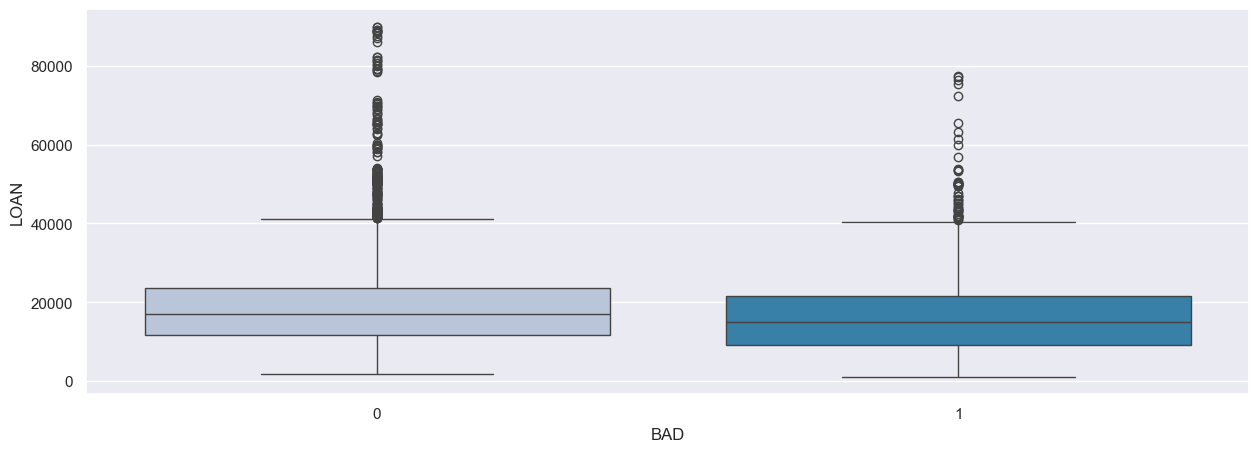

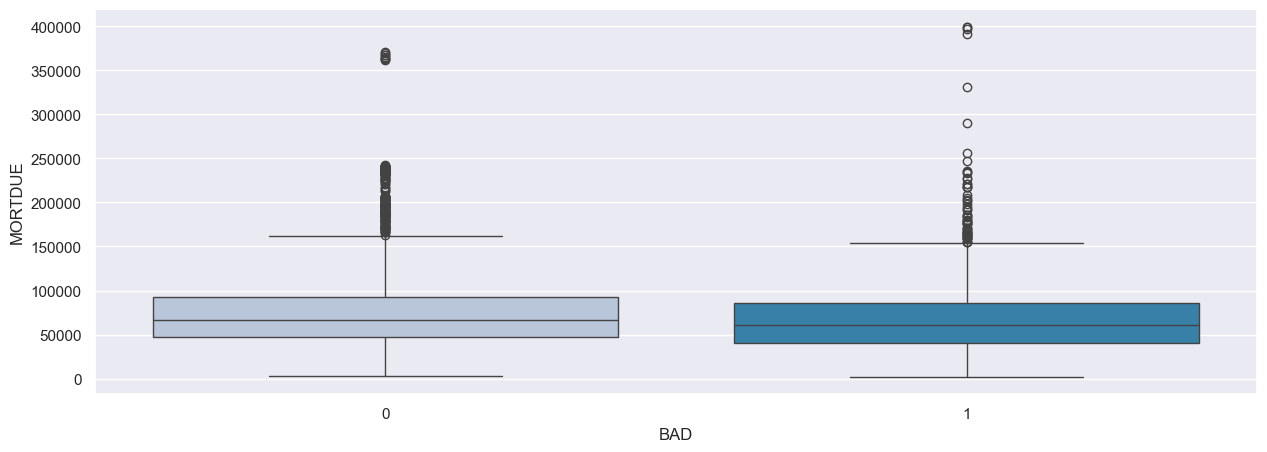

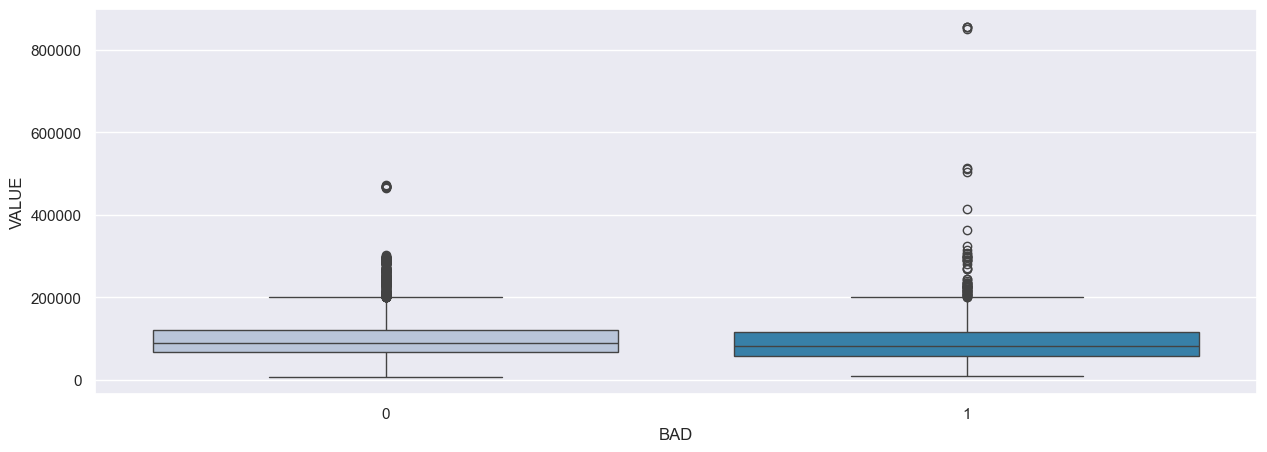

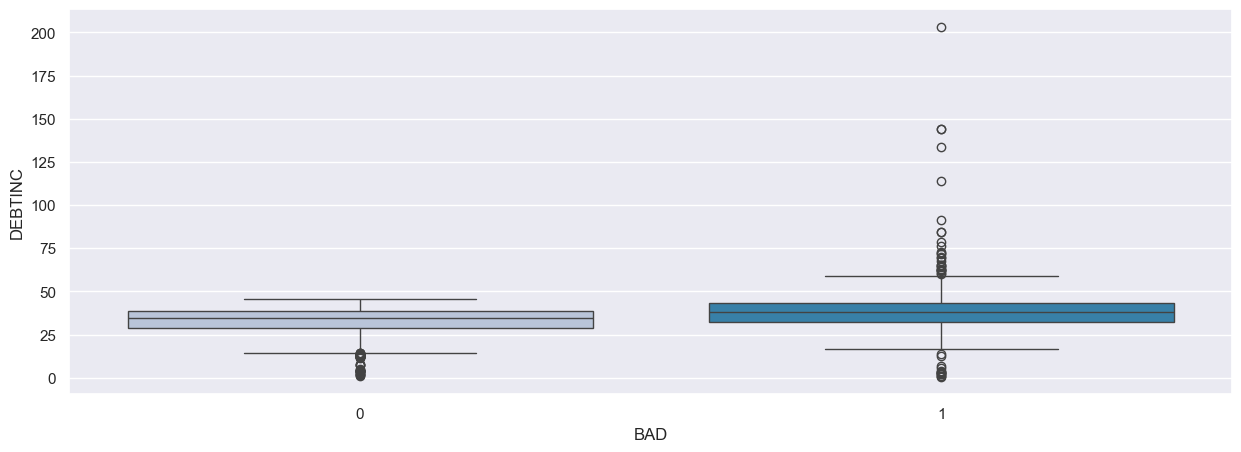

In [263]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=data["BAD"], y=data["LOAN"], palette="PuBu")

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["BAD"], y=data["MORTDUE"], palette="PuBu")

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["BAD"], y=data["VALUE"], palette="PuBu")

plt.figure(figsize=(15, 5))
sns.boxplot(x=data["BAD"], y=data["DEBTINC"], palette="PuBu")

Text(0.5, 1.0, 'VALUE vs DEBTINC')

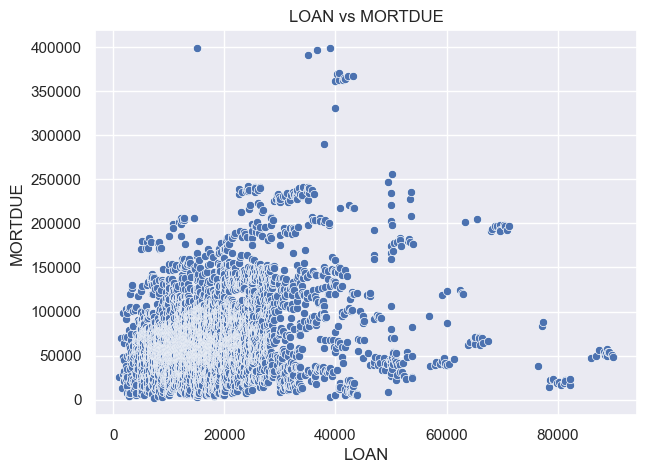

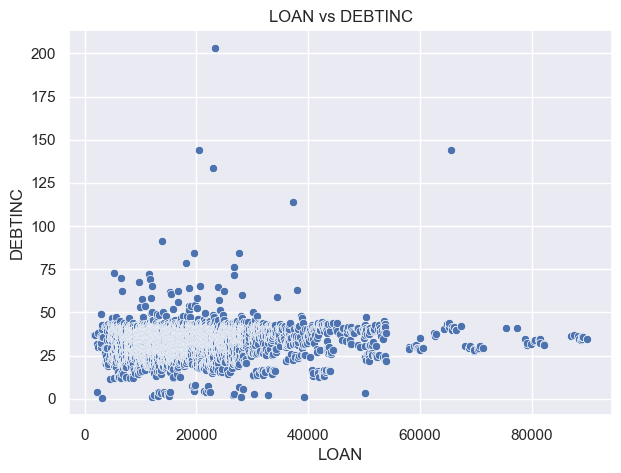

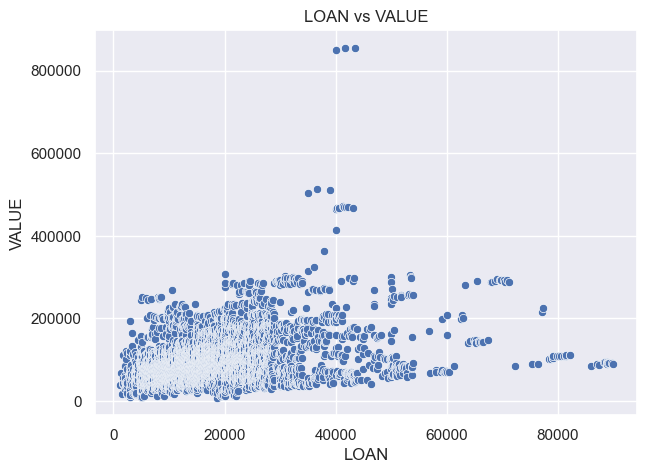

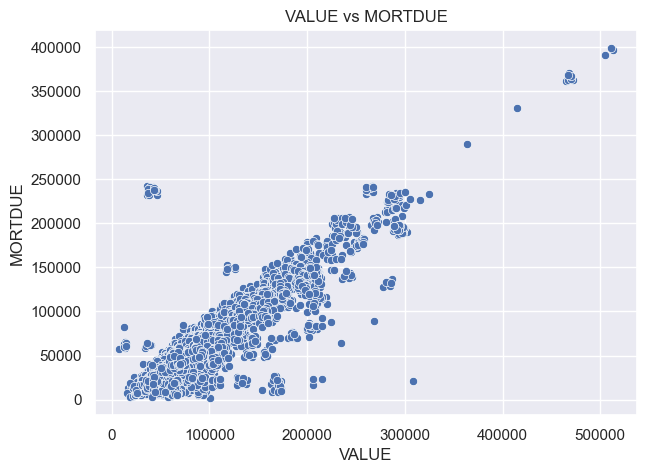

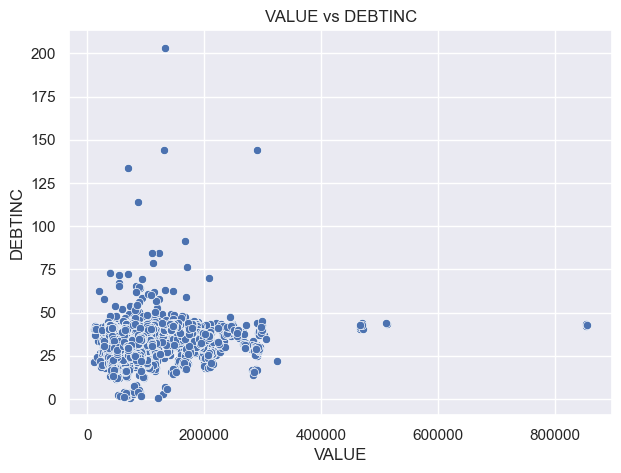

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot: LOAN vs MORTDUE
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data["MORTDUE"], palette="PuBu")
plt.title("LOAN vs MORTDUE")

# Scatterplot: LOAN vs DEBTINC
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data["DEBTINC"], palette="PuBu")
plt.title("LOAN vs DEBTINC")

# Scatterplot: LOAN vs VALUE
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["LOAN"], y=data["VALUE"], palette="PuBu")
plt.title("LOAN vs VALUE")

# Scatterplot: VALUE vs MORTDUE
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["VALUE"], y=data["MORTDUE"], palette="PuBu")
plt.title("VALUE vs MORTDUE")

# Scatterplot: VALUE vs DEBTINC
plt.figure(figsize=(7, 5))
sns.scatterplot(x=data["VALUE"], y=data["DEBTINC"], palette="PuBu")
plt.title("VALUE vs DEBTINC")

## Bivariate Analysis: BAD vs Categorical Variables

In [265]:
# Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x, data['BAD'], margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x, data['BAD'], normalize='index')
    tab.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


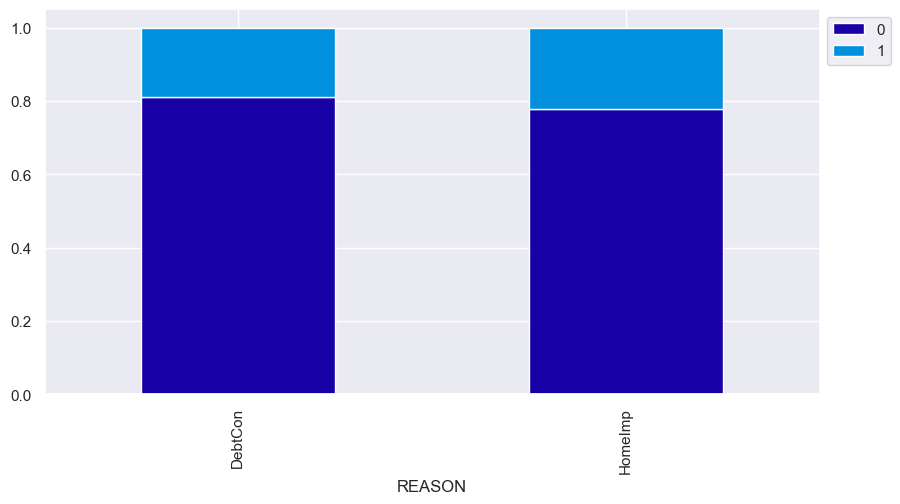

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


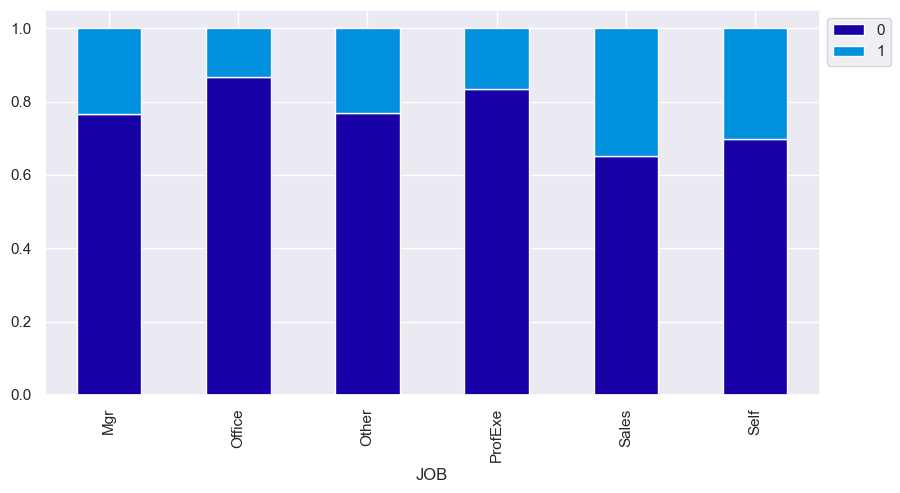

In [266]:
# Plotting stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])
stacked_plot(data['JOB'])

## Multivariate Analysis

<Axes: >

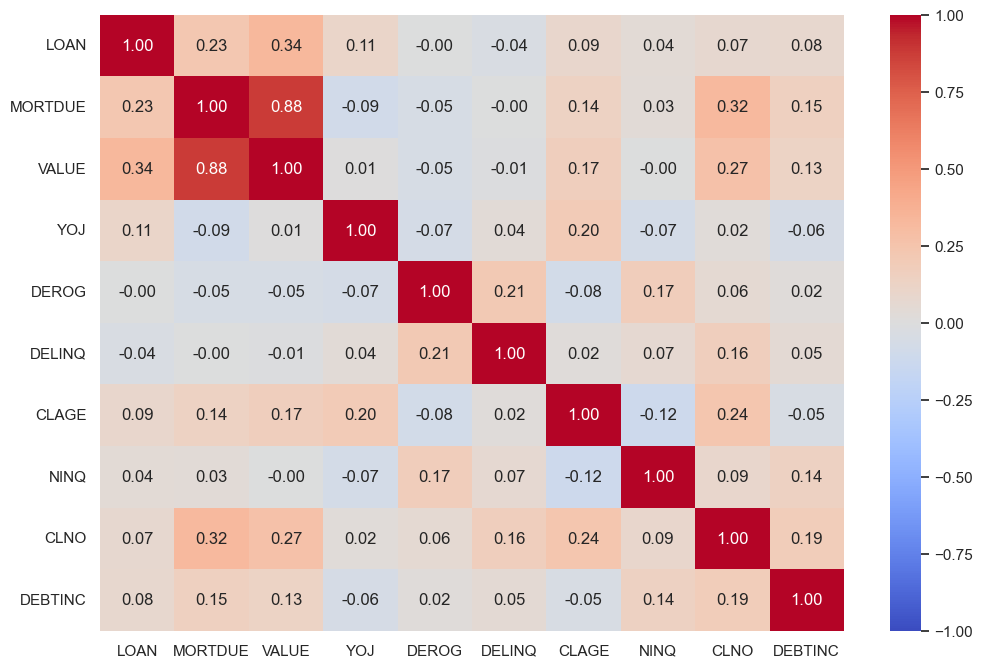

In [267]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Building correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1,
            fmt=".2f",
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

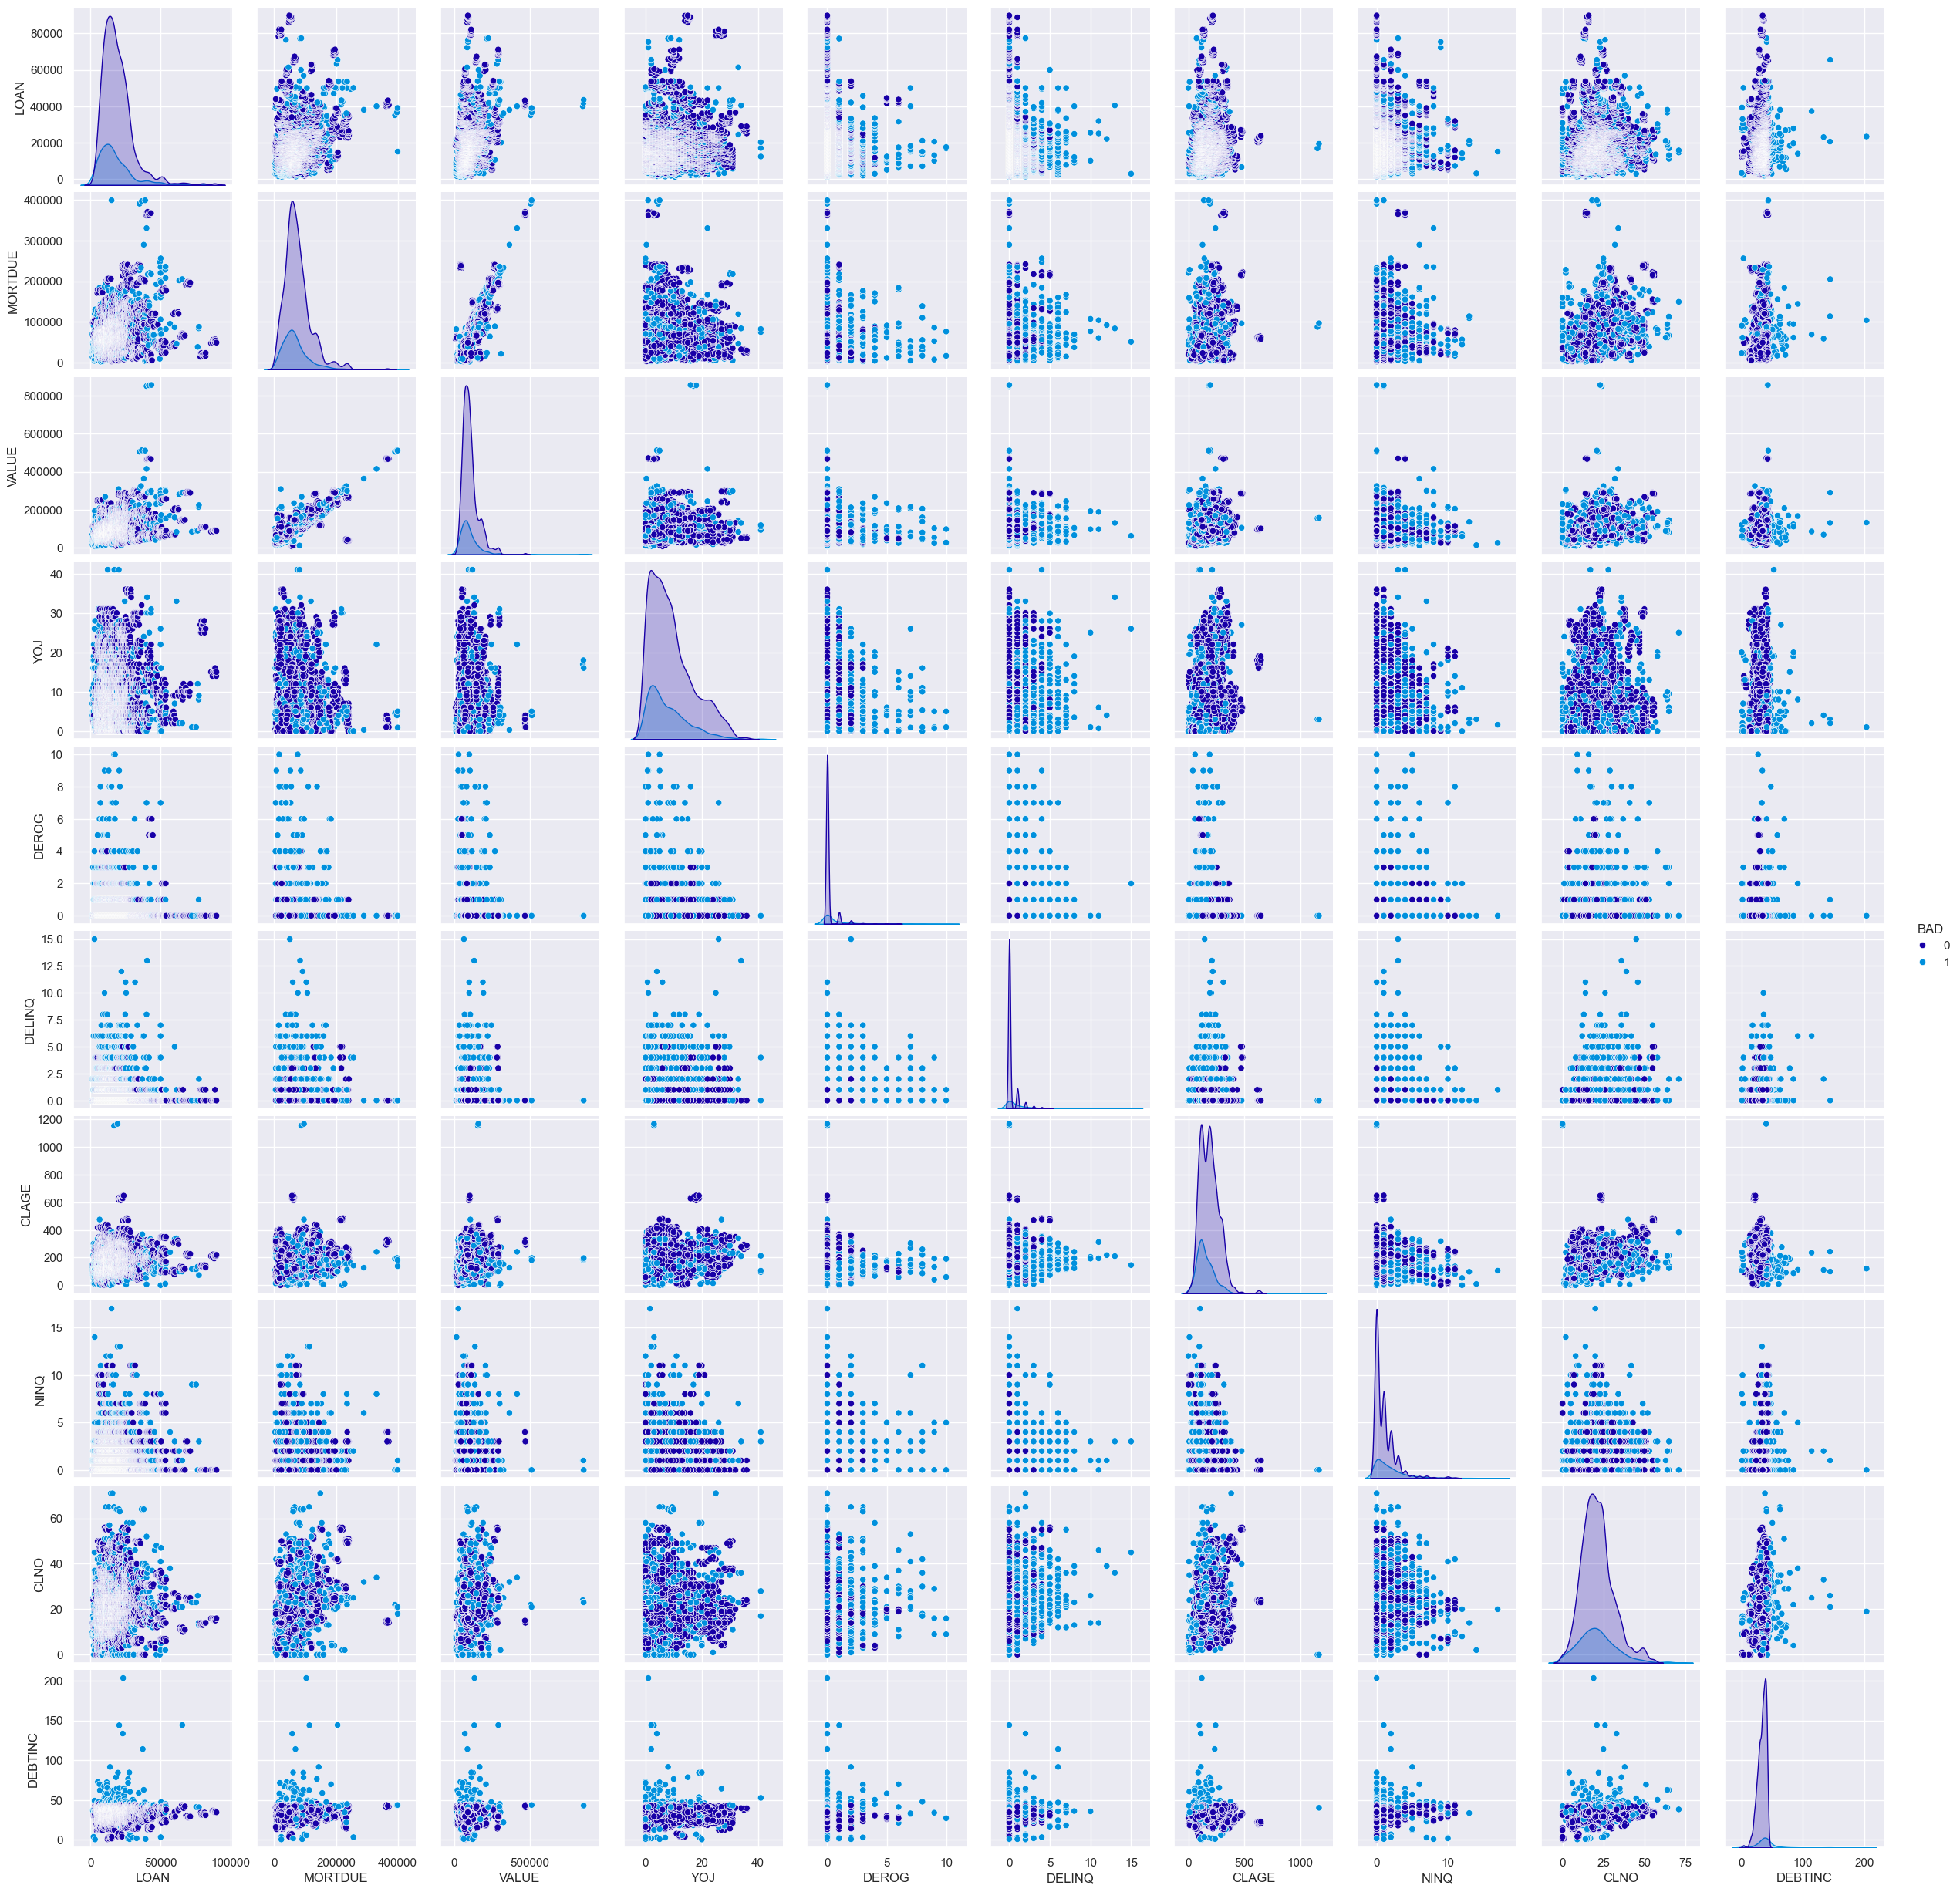

In [268]:
# Building pairplot for the data with hue = 'BAD'
sns.pairplot(data, hue="BAD")

In [269]:
def treat_outliers(df, col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1 = df[col].quantile(q=.25)  # 25th quantile
    Q3 = df[col].quantile(q=.75)  # 75th quantile
    IQR = Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  # define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [270]:
df_raw = data.copy()

# getting list of numerical columns
numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()

df = treat_outliers_all(df_raw, numerical_col)

In [271]:
df

BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0      1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1      1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2      1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3      1   1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4      0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ..    ...      ...       ...      ...     ...   ...    ...     ...   
5955   0  41600  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956   0  41600  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957   0  41600  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958   0  41600  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959   0  41600  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0        NaN  
1     121.833333   0.0  14.0        NaN  
2     149.466667   1.0  10.0        NaN  
3            NaN   NaN   NaN        NaN  
4      93.333333   0.0  14.0        NaN  
...          ...   ...   ...        ...  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519  

[5960 rows x 13 columns]

## Adding new columns in the dataset for each column which has missing values

In [272]:
# Step 1: Add binary missing value flags BEFORE filling
def add_binary_flag(df, col):
    '''
    Adds a new binary column indicating if original value was missing.
    '''
    new_col = f"{col}_missing_values_flag"
    df[new_col] = df[col].isna().astype(bool)  # Use int (1/0) for clarity


# Step 2: Identify columns with missing values and add flags
missing_cols = [col for col in df.columns if df[col].isnull().any()]
for col in missing_cols:
    add_binary_flag(df, col)

# Step 3: Fill missing values in numerical columns with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Step 4: Fill missing values in categorical columns with mode
cat_cols = df.select_dtypes(include='category').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 5: Verify all missing handled and flags created
print(df.isnull().sum())

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64


In [273]:
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2   1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_values_flag  REASON_missing_values_flag  \
0   94.366667  ...                      False                       False   
1  121.833333  ...                      False                       False   
2  149.466667  ...                      False                       False   
3  173.466667  ...                       True                        True   
4   93.333333  ...                      False                       False   

   JOB_missing_values_flag  YOJ_missing_values_flag  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                     True                     True   
4                    False                    False   

   DEROG_missing_values_flag  DELINQ_missing_values_flag  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                       True                        True   
4                      False                       False   

   CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0                      False                     False   
1                      False                     False   
2                      False                     False   
3                       True                      True   
4                      False                     False   

   CLNO_missing_values_flag  DEBTINC_missing_values_flag  
0                     False                         True  
1                     False                         True  
2                     False                         True  
3                      True                         True  
4                     False                         True  

[5 rows x 24 columns]

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [275]:
# creating a list of bool features
bool_cols = df.select_dtypes(['bool']).columns.tolist()

# droping missing value flags
X = df.drop(columns=bool_cols)

In [276]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## Data Preparation

In [277]:
# Separating the target variable and other variables
Y = X.BAD
X = X.drop(columns = ['BAD'])

# Creating dummy variables for the categorical variables

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data = X, columns = to_get_dummies_for, drop_first = True)

In [278]:
# Scaling the Data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [279]:
# Splitting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

## Model Evaluation Criterion

In [280]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [281]:
# Defining the Logistic regression model
lg = LogisticRegression()

# Fitting the model on the training data
lg.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      3340
           1       0.64      0.09      0.15       832

    accuracy                           0.81      4172
   macro avg       0.73      0.54      0.52      4172
weighted avg       0.78      0.81      0.74      4172



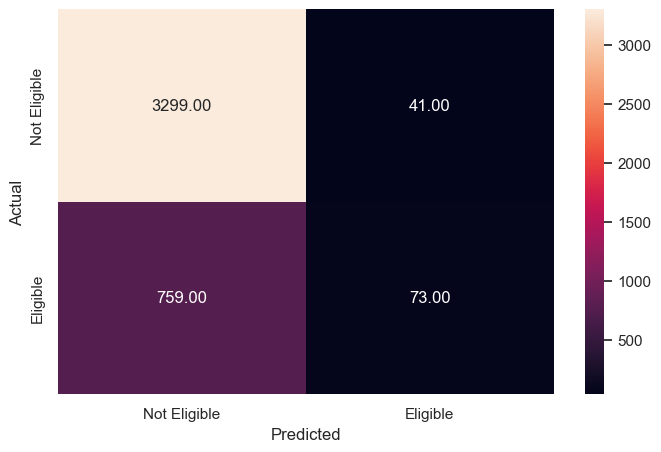

In [282]:
# Predicting for train set
y_pred_train = lg.predict(x_train)

# checking the performance on the train dataset
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1431
           1       0.68      0.08      0.15       357

    accuracy                           0.81      1788
   macro avg       0.75      0.54      0.52      1788
weighted avg       0.79      0.81      0.74      1788



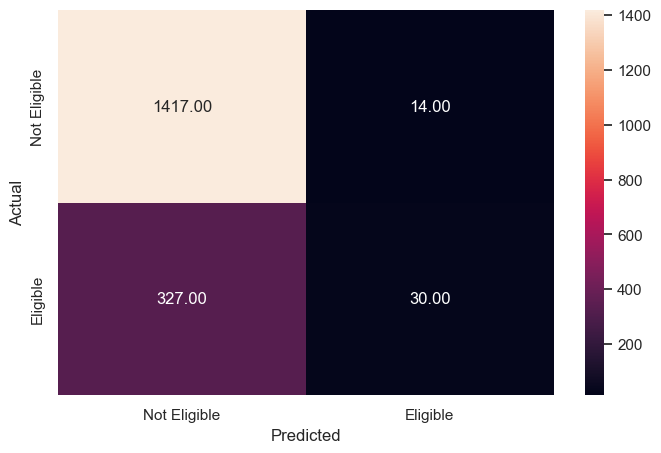

In [283]:
# Predicting for test set
y_pred_test = lg.predict(x_test)

# checking the performance on the test dataset
metrics_score(y_test, y_pred_test)

## Observations:

1. We are getting an accuracy of about 80% on the train and the test datasets.
2. However, the recall for this model is only around 9% for class 1 on the train data and 8% on the test data.
3. As the recall is low, this model will not perform well in differentiating out clients who have a high chance of defaulting the loan, meaning it will eventually not help in increasing the bank income.
4. As we can see from the Confusion Matrix, this model is not good at identifying clients who are at risk of defaulting.

In [284]:
# Printing the coefficients of logistic regression

cols = X_scaled.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg, columns = cols).T.sort_values(by = 0, ascending = False)

0
DEBTINC         0.417691
NINQ            0.292115
REASON_HomeImp  0.148637
JOB_Sales       0.083027
JOB_Self        0.071628
VALUE           0.055412
CLNO            0.047280
DEROG           0.000000
DELINQ          0.000000
YOJ            -0.055208
JOB_ProfExe    -0.103122
JOB_Other      -0.109442
LOAN           -0.192589
JOB_Office     -0.196794
MORTDUE        -0.228772
CLAGE          -0.411833

In [285]:
# The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world.
# We can convert the log of odds into odds by taking its exponential.

odds = np.exp(lg.coef_[0])  # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

odds
DEBTINC         1.518451
NINQ            1.339257
REASON_HomeImp  1.160252
JOB_Sales       1.086571
JOB_Self        1.074255
VALUE           1.056976
CLNO            1.048416
DEROG           1.000000
DELINQ          1.000000
YOJ             0.946288
JOB_ProfExe     0.902017
JOB_Other       0.896334
LOAN            0.824821
JOB_Office      0.821360
MORTDUE         0.795510
CLAGE           0.662435

The Precision-Recall Curve for Logistic Regression

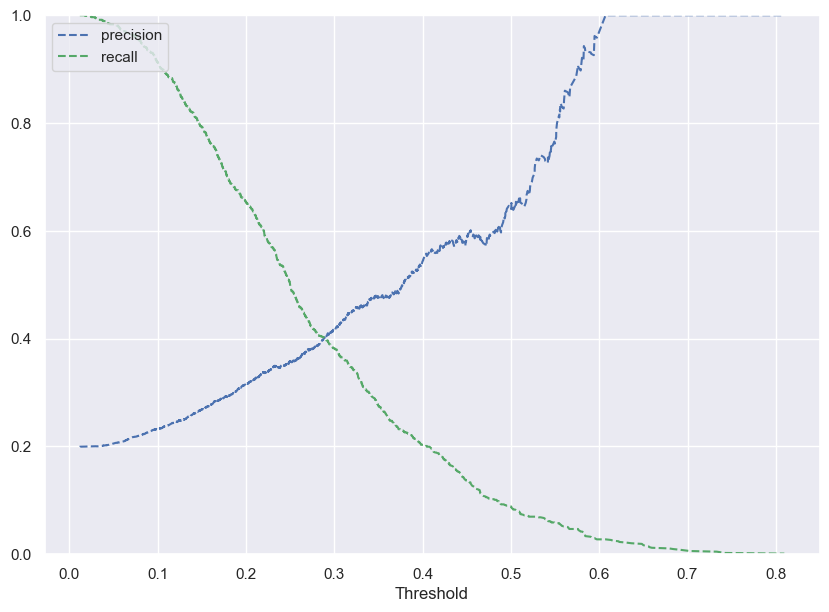

In [286]:
# predict_proba gives the probability of each observation belonging to each class
y_scores_lg = lg.predict_proba(x_train)


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')

plt.xlabel('Threshold')

plt.legend(loc='upper left')

plt.ylim([0, 1])

plt.show()

Observation:

We can see that the precision and the recall are balanced for a threshold of about 0.28.

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3340
           1       0.39      0.41      0.40       832

    accuracy                           0.75      4172
   macro avg       0.62      0.62      0.62      4172
weighted avg       0.76      0.75      0.76      4172



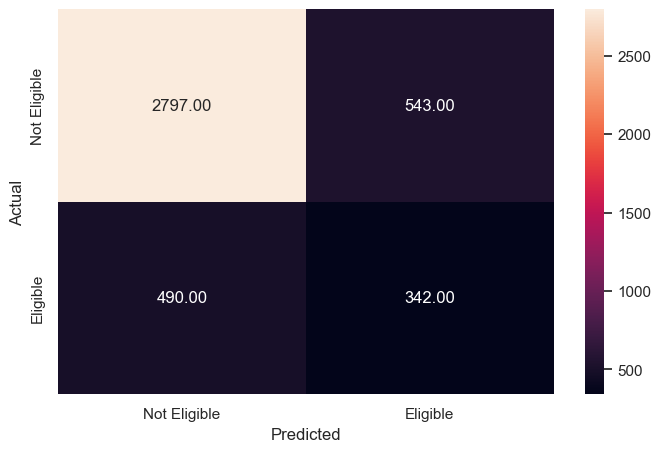

In [287]:
optimal_threshold1 = .28

y_pred_train = lg.predict_proba(x_train)

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1431
           1       0.39      0.41      0.40       357

    accuracy                           0.76      1788
   macro avg       0.62      0.63      0.62      1788
weighted avg       0.76      0.76      0.76      1788



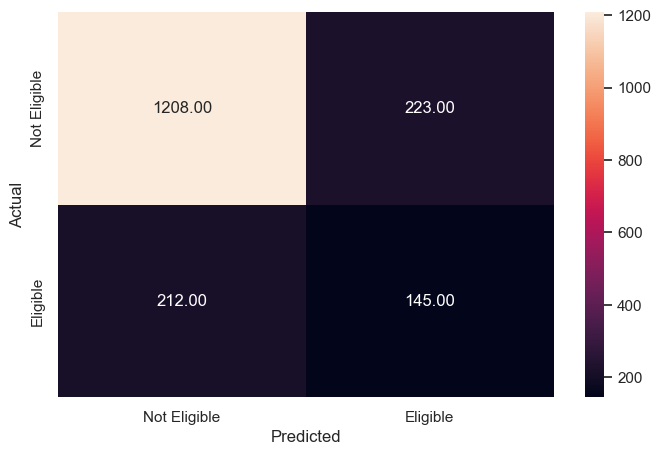

In [288]:
optimal_threshold1 = .28

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

## Build a Decision Tree Model

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

In [290]:
data = df.copy()

In [291]:
# Separating the target variable and other variables
Y = data.BAD
X = data.drop(columns=['BAD'])

# Creating the list of columns for which we need to create the dummy variables
to_get_dummies_for = ['REASON', 'JOB']

# Creating dummy variables
X = pd.get_dummies(data=X, columns=to_get_dummies_for, drop_first=True)

In [292]:
X

LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0      1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1      1300  70053.0   68400.0   7.0    0.0     0.0  121.833333   0.0  14.0   
2      1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3      1500  65019.0   89235.5   7.0    0.0     0.0  173.466667   1.0  20.0   
4      1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   
...     ...      ...       ...   ...    ...     ...         ...   ...   ...   
5955  41600  57264.0   90185.0  16.0    0.0     0.0  221.808718   0.0  16.0   
5956  41600  54576.0   92937.0  16.0    0.0     0.0  208.692070   0.0  15.0   
5957  41600  54045.0   92924.0  15.0    0.0     0.0  212.279697   0.0  15.0   
5958  41600  50370.0   91861.0  14.0    0.0     0.0  213.892709   0.0  16.0   
5959  41600  48811.0   88934.0  15.0    0.0     0.0  219.601002   0.0  16.0   

        DEBTINC  ...  CLAGE_missing_values_flag  NINQ_missing_values_flag  \
0     34.818262  ...                      False                     False   
1     34.818262  ...                      False                     False   
2     34.818262  ...                      False                     False   
3     34.818262  ...                       True                      True   
4     34.818262  ...                      False                     False   
...         ...  ...                        ...                       ...   
5955  36.112347  ...                      False                     False   
5956  35.859971  ...                      False                     False   
5957  35.556590  ...                      False                     False   
5958  34.340882  ...                      False                     False   
5959  34.571519  ...                      False                     False   

      CLNO_missing_values_flag  DEBTINC_missing_values_flag  REASON_HomeImp  \
0                        False                         True            True   
1                        False                         True            True   
2                        False                         True            True   
3                         True                         True           False   
4                        False                         True            True   
...                        ...                          ...             ...   
5955                     False                        False           False   
5956                     False                        False           False   
5957                     False                        False           False   
5958                     False                        False           False   
5959                     False                        False           False   

      JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  JOB_Self  
0          False       True        False      False     False  
1          False       True        False      False     False  
2          False       True        False      False     False  
3          False       True        False      False     False  
4           True      False        False      False     False  
...          ...        ...          ...        ...       ...  
5955       False       True        False      False     False  
5956       False       True        False      False     False  
5957       False       True        False      False     False  
5958       False       True        False      False     False  
5959       False       True        False      False     False  

[5960 rows x 27 columns]

In [293]:
# Split the data into training and test set (We use Stratify = 1 because data is unbalanced)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [294]:
# Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [295]:
# fitting Decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



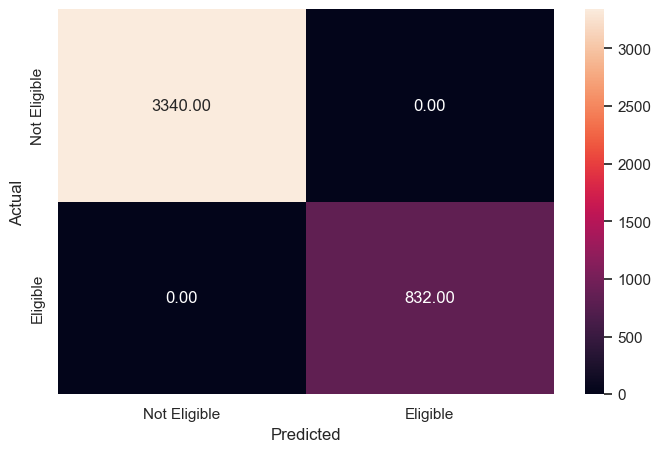

In [296]:
# Checking performance on the training data

y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1431
           1       0.66      0.59      0.62       357

    accuracy                           0.86      1788
   macro avg       0.78      0.76      0.77      1788
weighted avg       0.85      0.86      0.85      1788



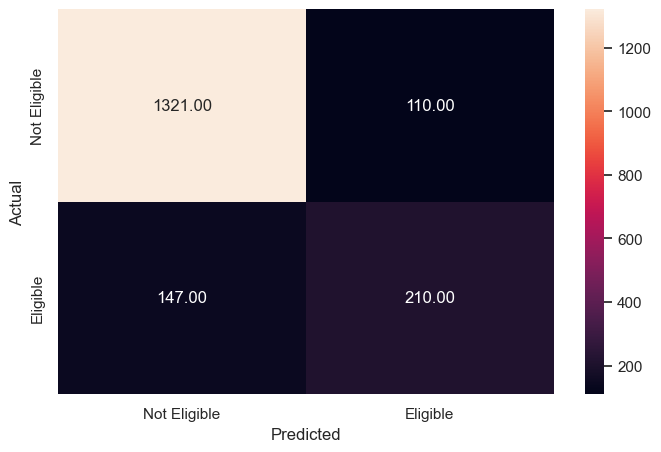

In [297]:
# Checking performance on the testing data

y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

Insights

1. The Decision Tree works well on the training data but not so well on the test data as the recall is 0.62 in comparison to 1.00 for the training dataset, i.e., the Decision Tree is overfitting the training data.
2. The precision on the test data suggests that there's a 27% (1 - 0.73) chance that the model will predict that a client is going to default even though he/she would not (false positive), increasing the risk for the bank to loses income.
3. The recall in this model is greater than in logistical regression: 0.62 vs. 0.41.

Decision Tree - Hyperparameter Tuning
1. We'll use Grid search to perform hyperparameter tuning.
2. Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
3. It is an exhaustive search that is performed on the specific parameter values of a model.
4. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

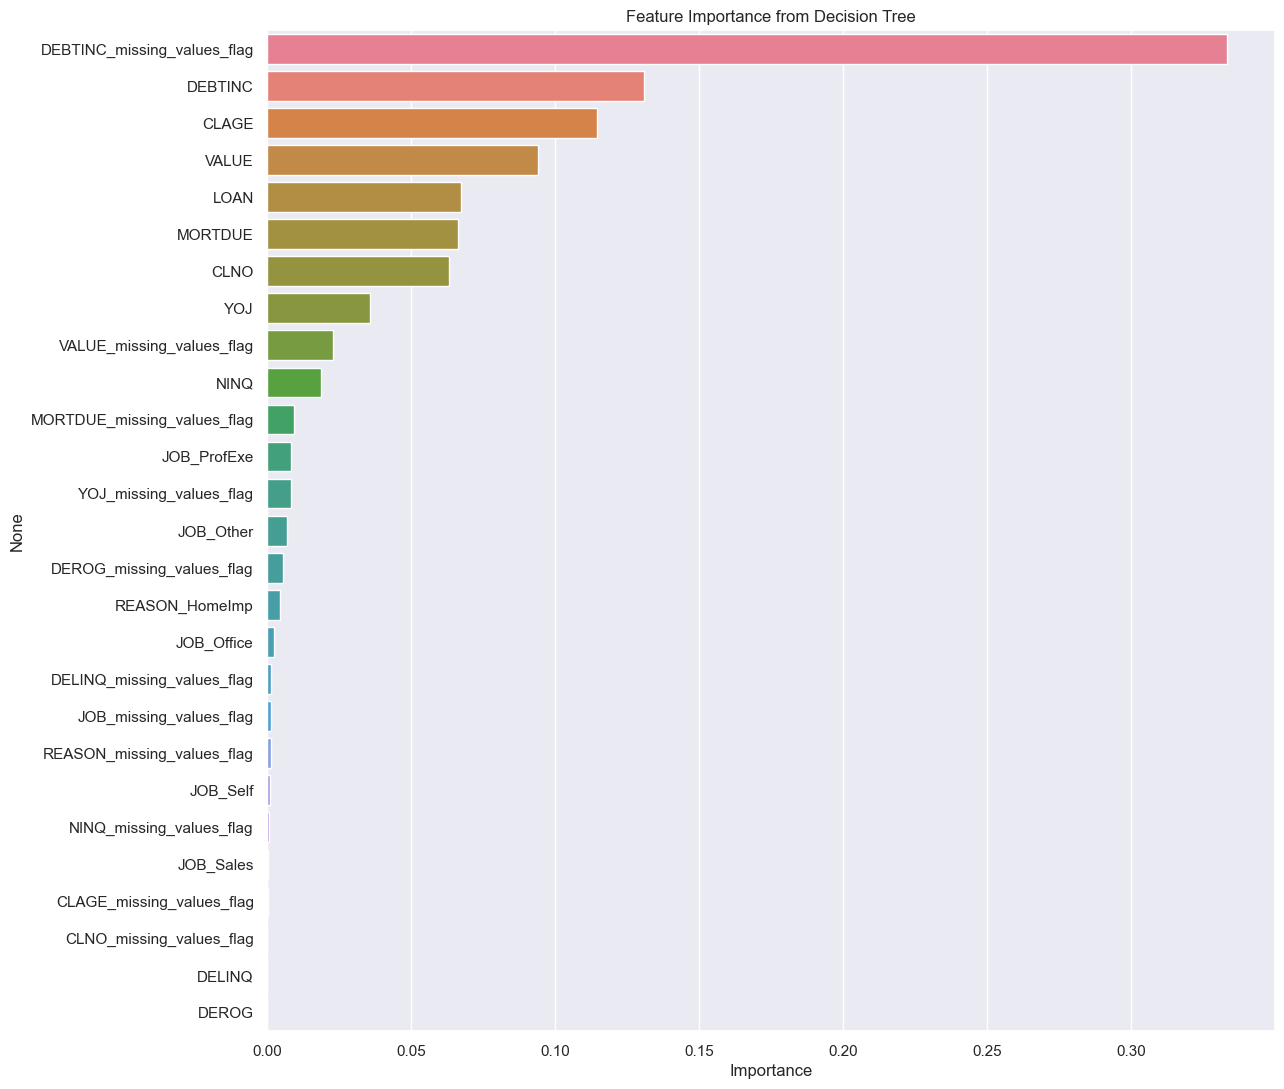

In [298]:
# Plotting the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index, data=importance_df, palette='husl')
plt.title('Feature Importance from Decision Tree')
plt.show()

1. According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC, CLAGE and LOAN.
2. This might signify that any client with no data in the DEBTINC ratio, will not receive any loan.
3. The other important features are MORTDUE, VALUE.

## Using GridSearchCV for Hyperparameter tuning on the model

In [299]:
# Choosing the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=10)

# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(x_train, y_train)

# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fitting the best algorithm to the data.
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       min_samples_leaf=10, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3340
           1       0.62      0.80      0.70       832

    accuracy                           0.86      4172
   macro avg       0.78      0.84      0.80      4172
weighted avg       0.88      0.86      0.87      4172



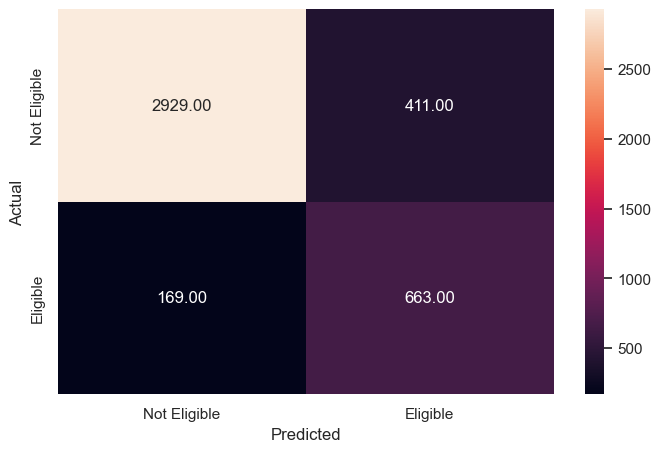

In [300]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1431
           1       0.61      0.76      0.67       357

    accuracy                           0.85      1788
   macro avg       0.77      0.82      0.79      1788
weighted avg       0.87      0.85      0.86      1788



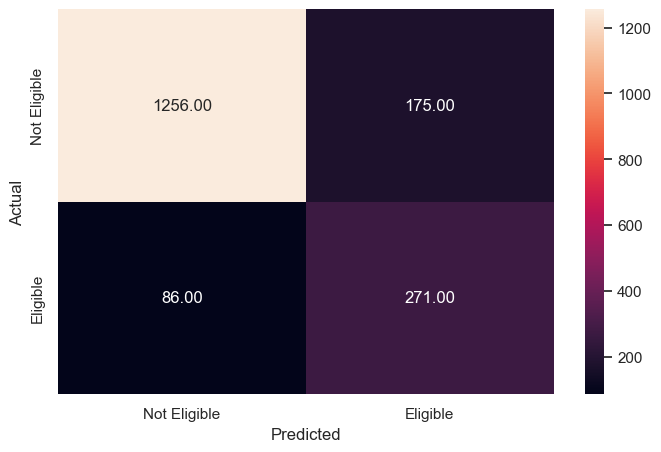

In [301]:
# Checking performance on the testing data based on the tuned model

y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

Insights

1. In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly (1.00 to 0.74) This makes sense because we are trying to reduce overfitting.
2. The tuned model is performing well in comparison to the model with default values of hyperparameters: Recall increases from 0.61 to 0.74 in test data.
3. This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
4. Precision has gone down significantly from .73 to .62 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the client is going to default even if he/she won't, and this will increases the risk of losing income.

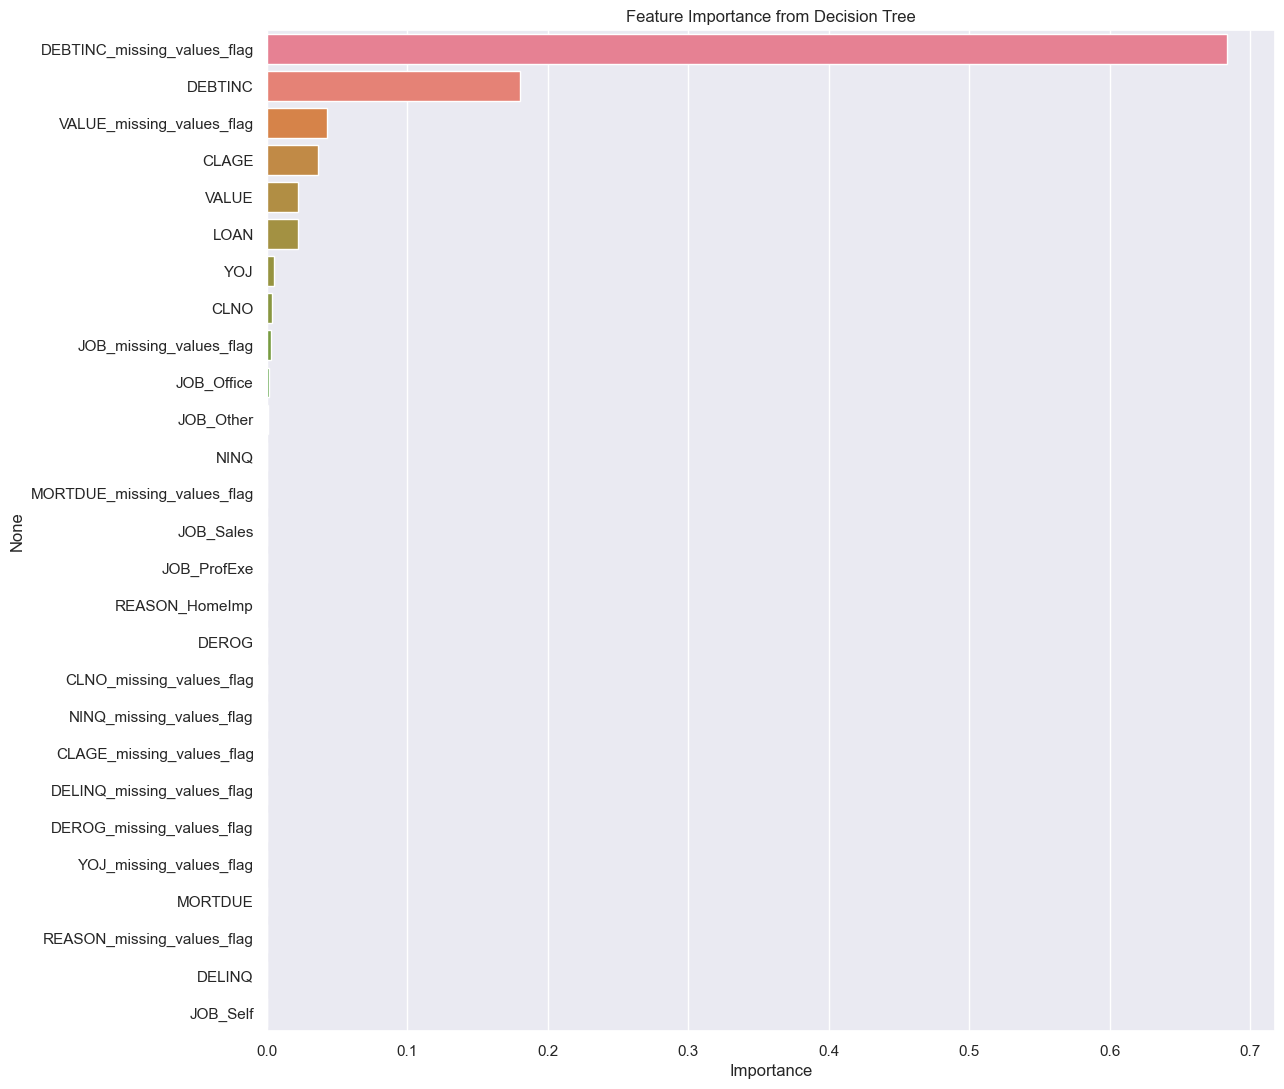

In [302]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=[
                             'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index,data=importance_df, palette='husl')
plt.title('Feature Importance from Decision Tree')
plt.show()

Observations:

1. After tuning the model we are getting that only 8 features are important.
2. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
3. According to this model too, DEBTINC_missing_value, DEBTINC, DELINQ, CLAGE, DEROG, CLNO, MORTDUE and YOG are the most important features that describe why a client is defaulting.

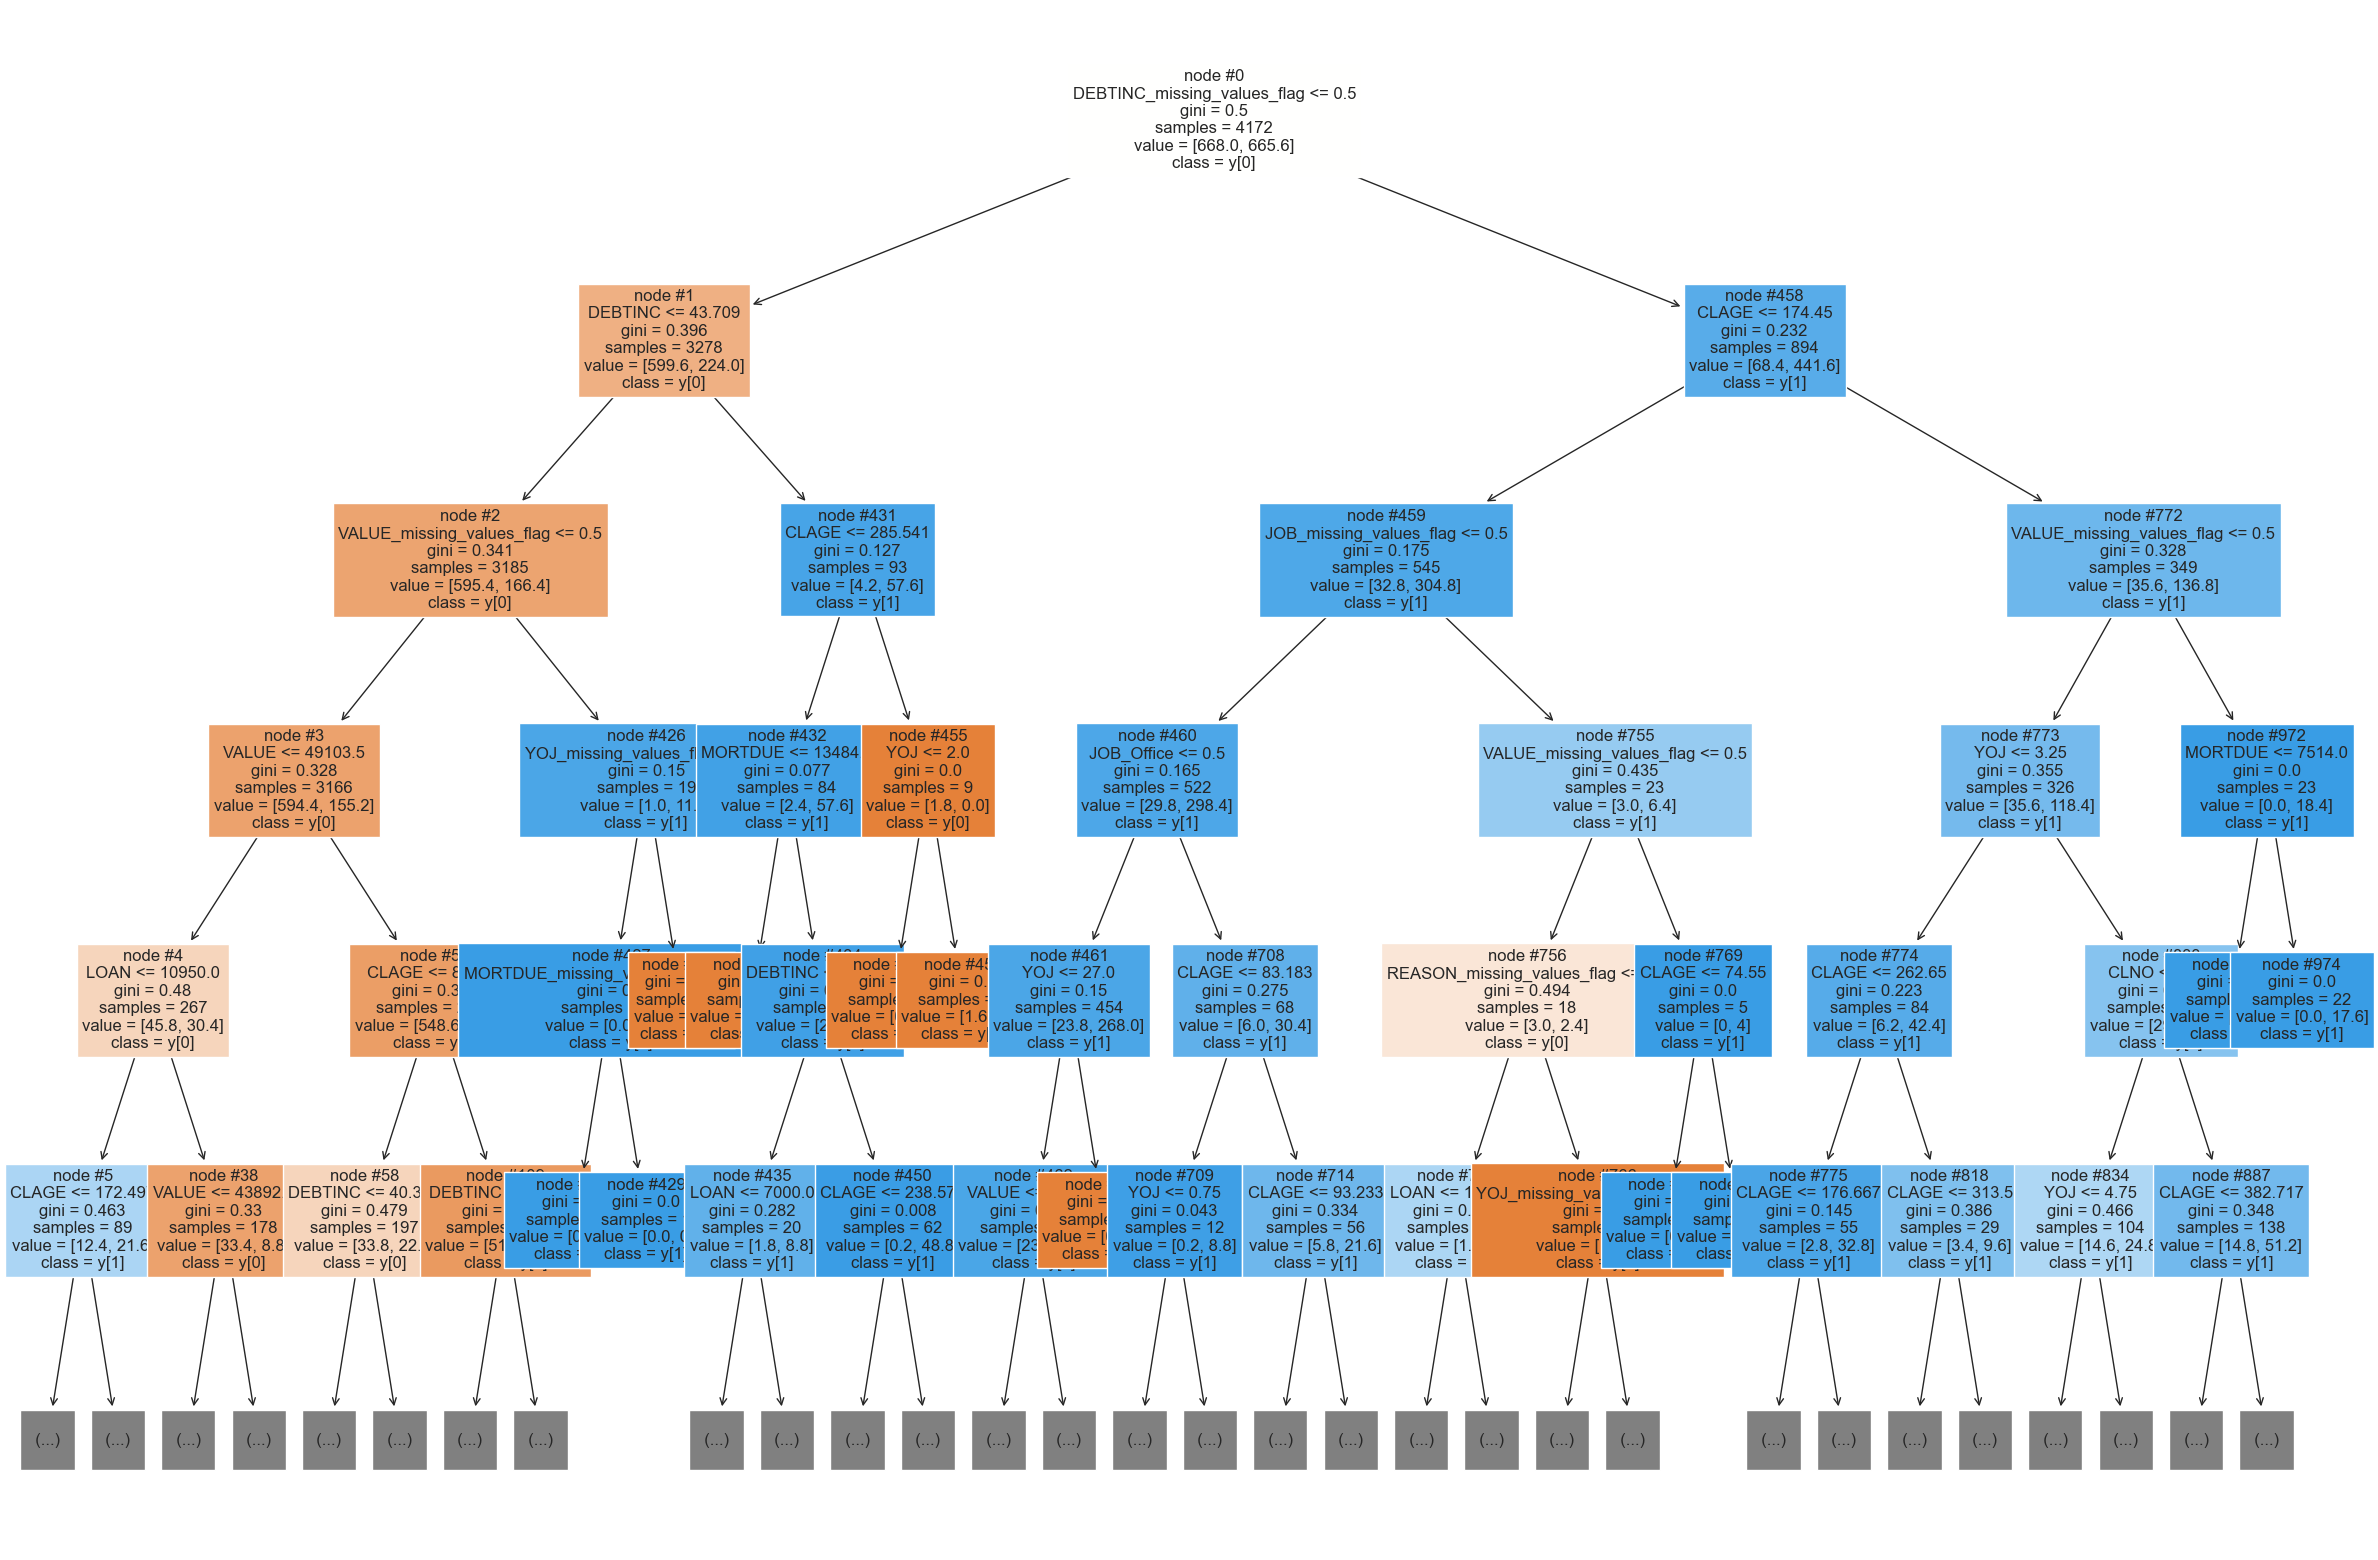

In [303]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize=(30, 20))

tree.plot_tree(dt, max_depth=5, feature_names=features,filled=True, fontsize=12, node_ids=True, class_names=True)

plt.show()

Building a Random Forest Classifier

In [304]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



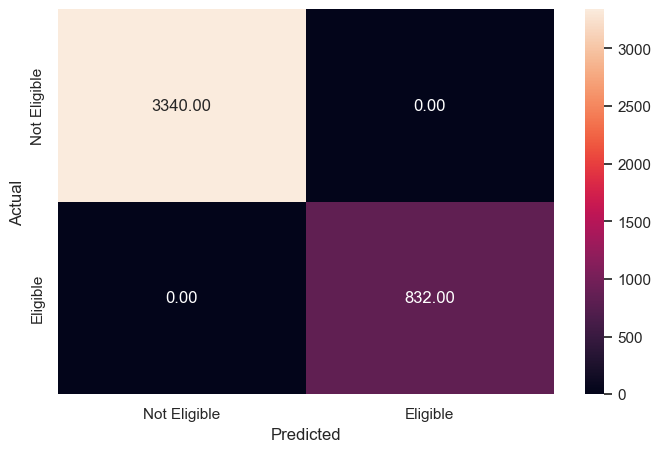

In [305]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1431
           1       0.79      0.68      0.73       357

    accuracy                           0.90      1788
   macro avg       0.85      0.82      0.83      1788
weighted avg       0.90      0.90      0.90      1788



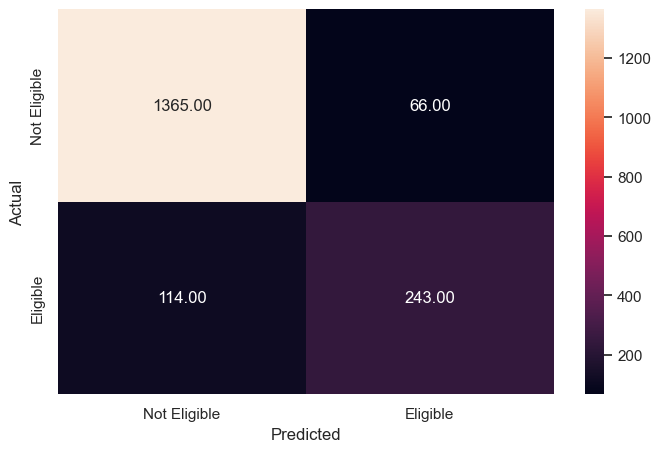

In [306]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [307]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(
    class_weight={0: 0.2, 1: 0.8}, random_state=1)

# Fitting Random Forest model
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



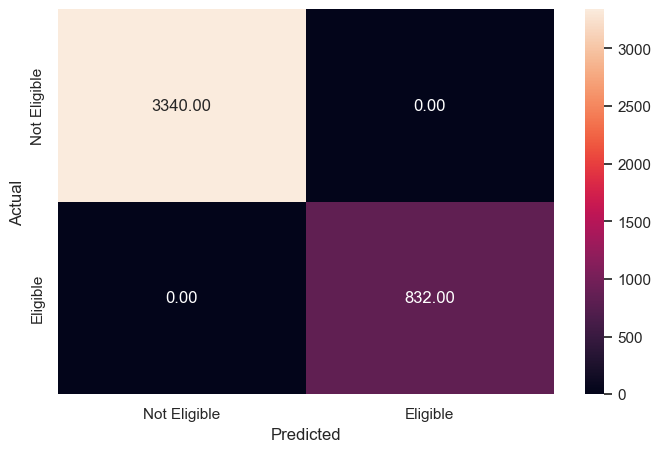

In [308]:
# Checking performance on the train data

y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1431
           1       0.78      0.64      0.71       357

    accuracy                           0.89      1788
   macro avg       0.85      0.80      0.82      1788
weighted avg       0.89      0.89      0.89      1788



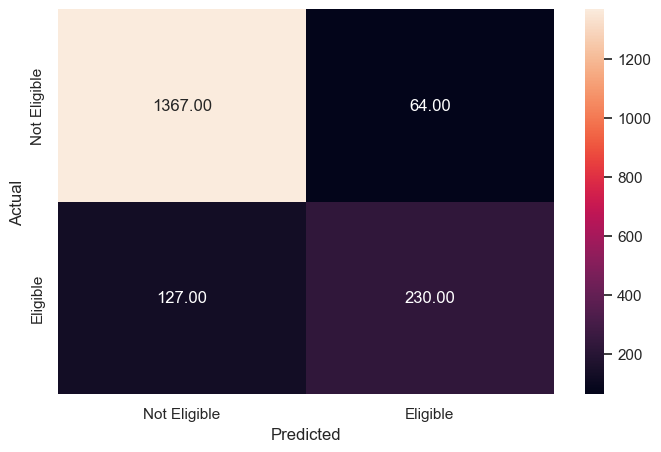

In [309]:
# Checking performance on the test data

y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

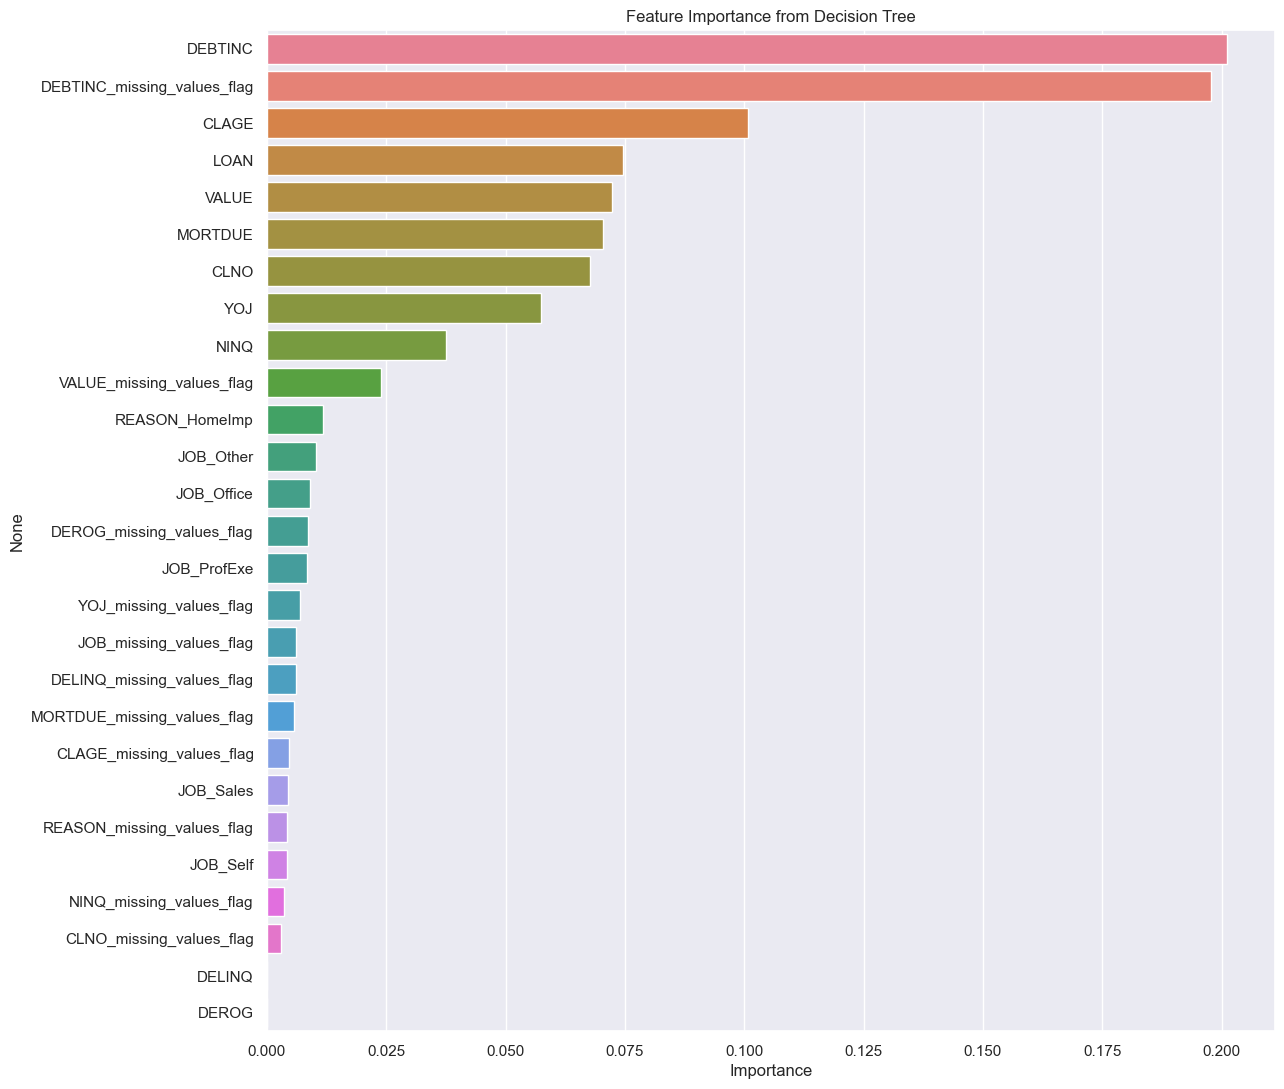

In [310]:
# importance of features in the tree building
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=[
                             'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index,
            data=importance_df, palette='husl')
plt.title('Feature Importance from Decision Tree')
plt.show()

## Tuning the Random Forest

1. We'll use Grid search to perform hyperparameter tuning.
2. Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
3. It is an exhaustive search that is performed on the specific parameter values of a model.
4. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [311]:
# Choosing the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
params_rf = {
    "n_estimators": [100, 250, 500],
    "min_samples_leaf": np.arange(1, 4, 1),
    "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)


# Running the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf,
                        scoring=scorer, cv=5, n_jobs=-1, verbose=1)


# fitting the GridSearch on train dataset
grid_obj = grid_obj.fit(x_train, y_train)


# Setting the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fitting the best algorithm to the data.
rf_estimator_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


RandomForestClassifier(max_features=0.9, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



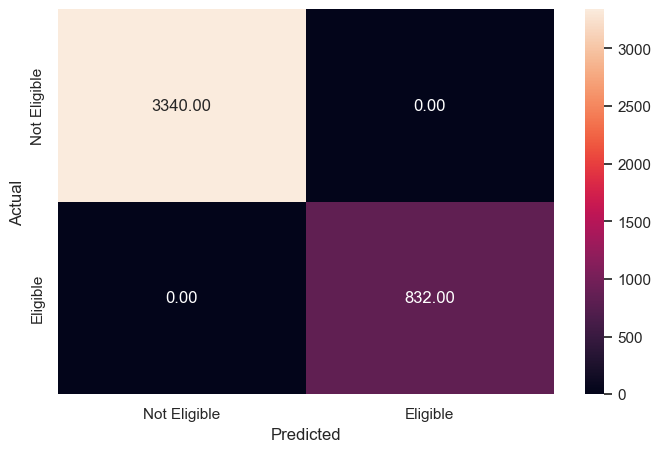

In [312]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1431
           1       0.76      0.64      0.70       357

    accuracy                           0.89      1788
   macro avg       0.84      0.80      0.81      1788
weighted avg       0.88      0.89      0.88      1788



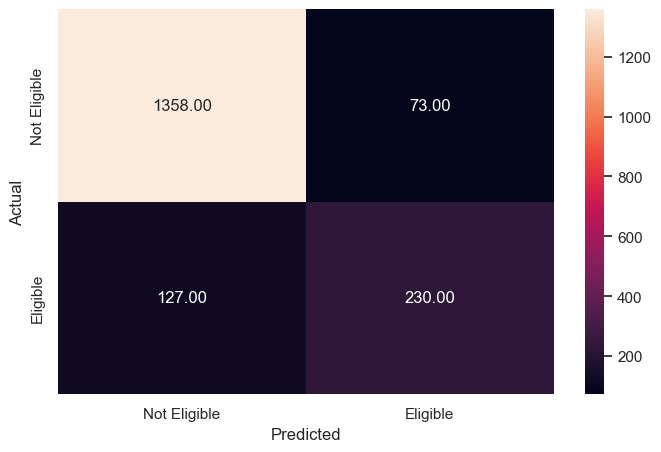

In [313]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

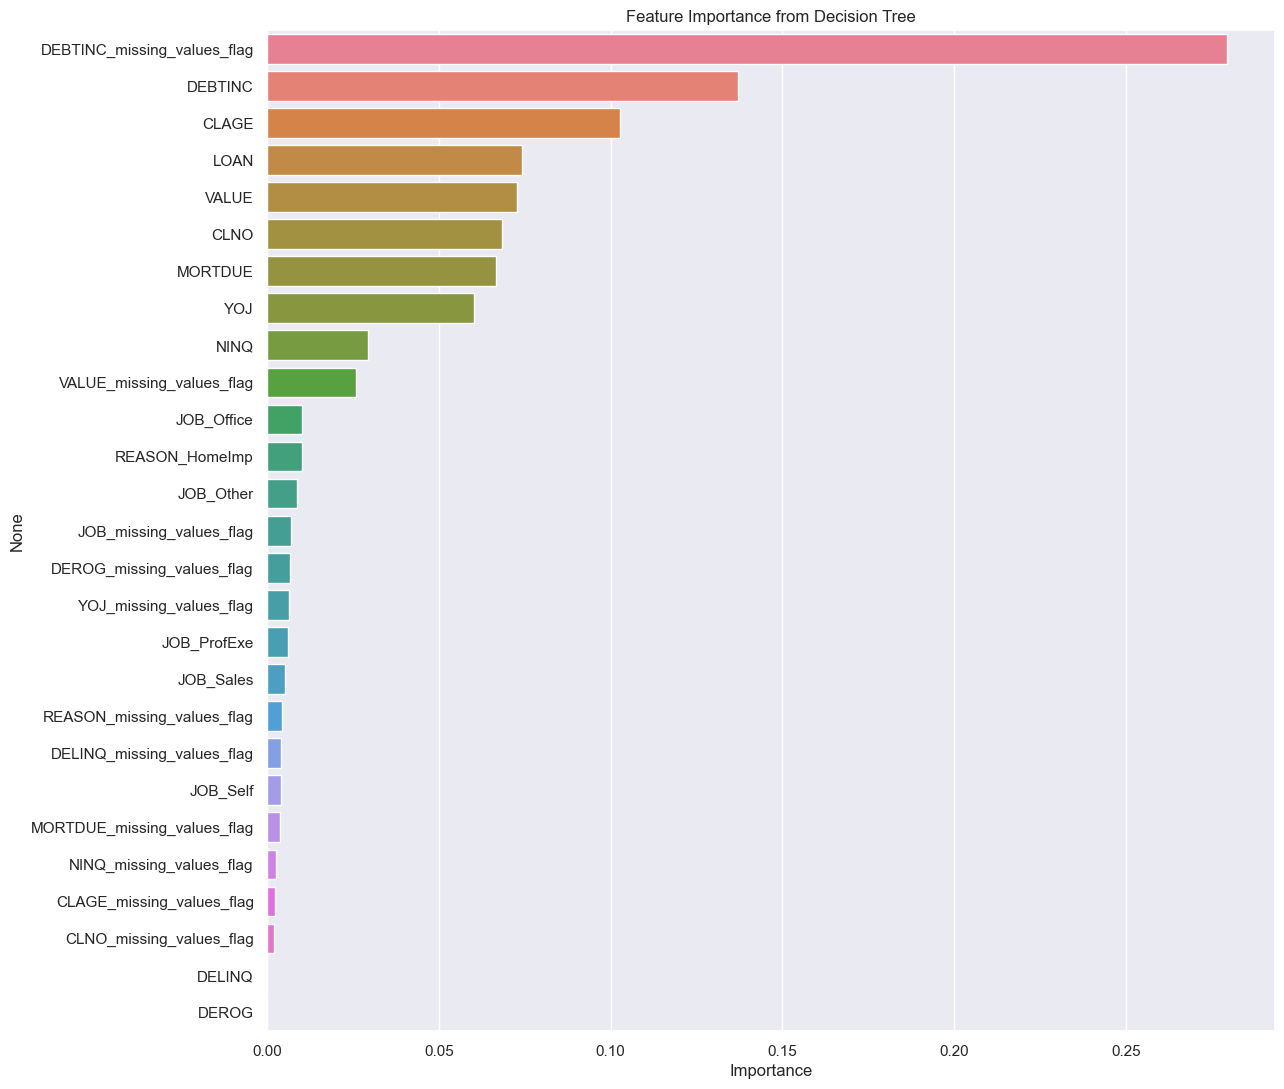

In [314]:
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=[
                             'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))

sns.barplot(x='Importance', y=importance_df.index,
            data=importance_df, palette='husl')
plt.title('Feature Importance from Decision Tree')
plt.show()

## Trying the same on XGboost

In [332]:
!pip install xgboost

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       0.99      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



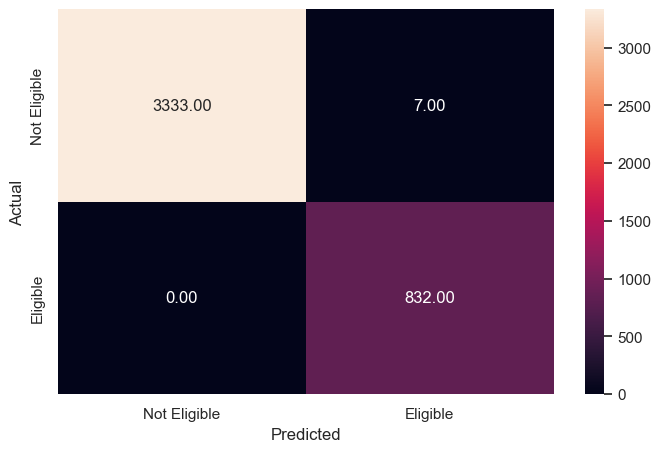

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1431
           1       0.78      0.72      0.75       357

    accuracy                           0.90      1788
   macro avg       0.86      0.83      0.84      1788
weighted avg       0.90      0.90      0.90      1788



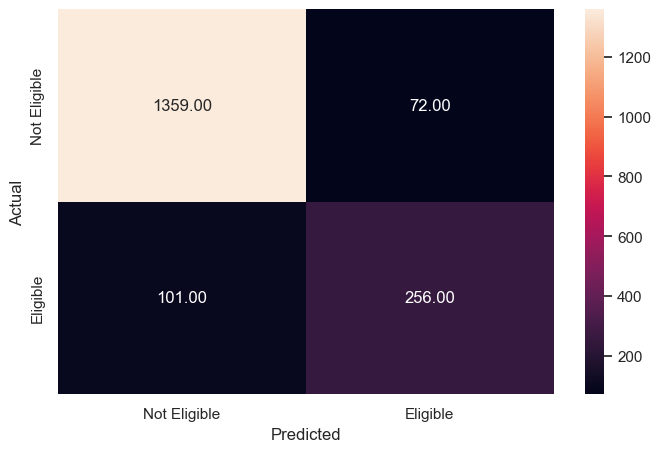

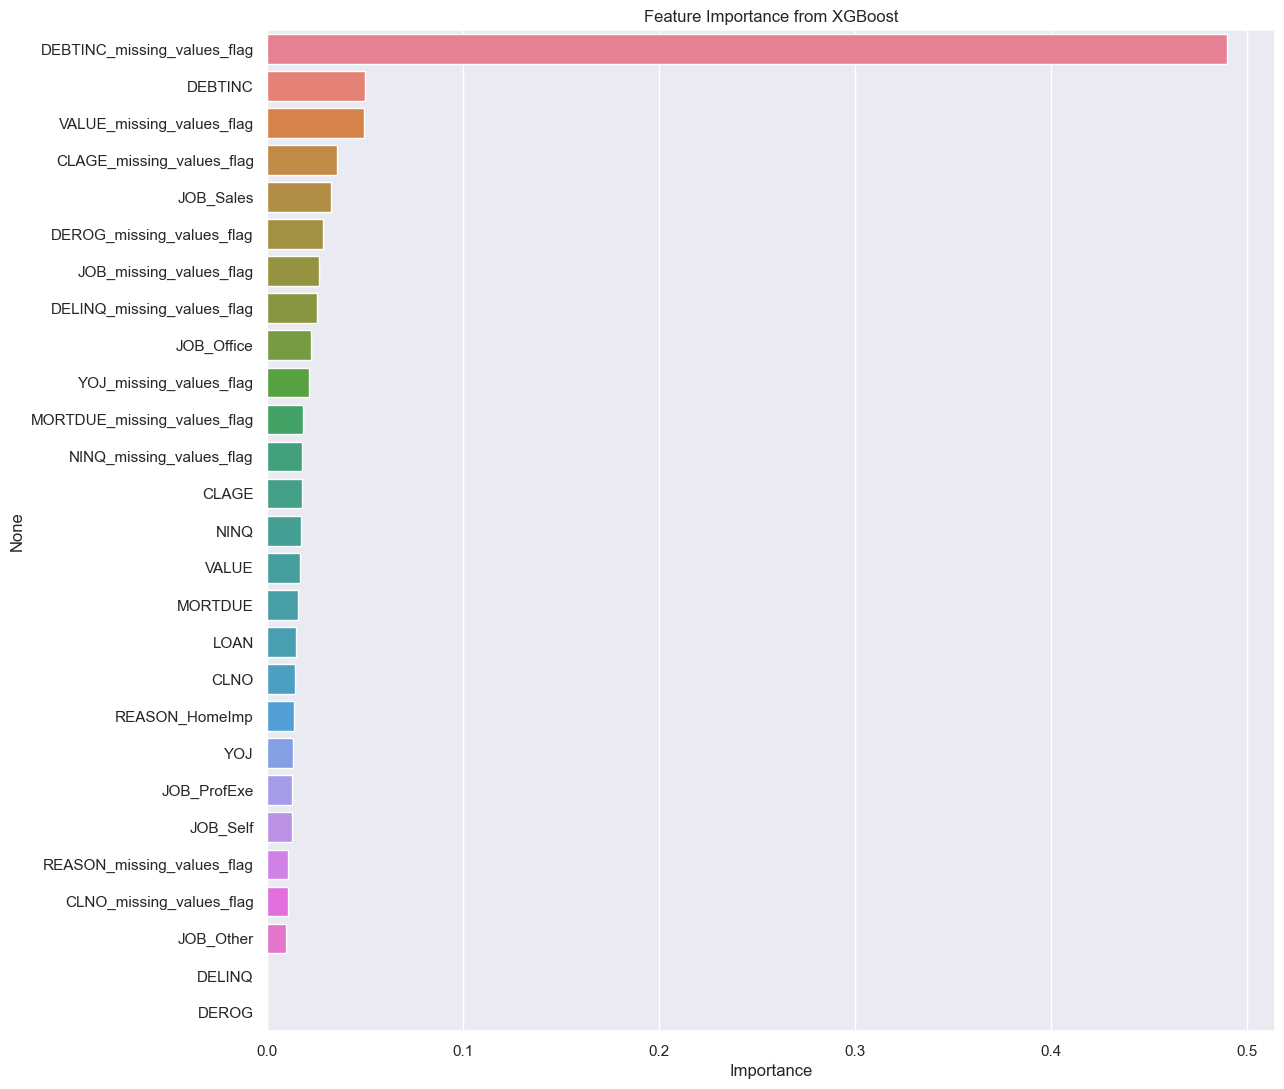

In [345]:
# Checking performance on the training data
y_pred_train_xgb = xgb_estimator_manual.predict(x_train)
metrics_score(y_train, y_pred_train_xgb)

# Checking performance on the test data
y_pred_test_xgb = xgb_estimator_manual.predict(x_test)
metrics_score(y_test, y_pred_test_xgb)

# Plotting feature importance
importances = xgb_estimator_manual.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=[
                             'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x='Importance', y=importance_df.index,
            data=importance_df, palette='husl')
plt.title('Feature Importance from XGBoost')
plt.show()

## Tuning hyperparameters for XGboost using GridsearchCV

In [346]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Define the base XGBoost classifier
xgb_estimator = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss', random_state=1)

# Define hyperparameter grid
params_xgb = {
    "n_estimators": [100, 250, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

# Use recall as the scoring metric
scorer = make_scorer(recall_score, pos_label=1)

# Setup GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb_estimator,
                        param_grid=params_xgb,
                        scoring=scorer,
                        cv=5,
                        n_jobs=-1,
                        verbose=1)

# Fit the grid search to training data
grid_xgb.fit(x_train, y_train)

# Get best estimator
xgb_estimator_tuned = grid_xgb.best_estimator_

# Fit the best model again (optional, already fitted during grid search)
xgb_estimator_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



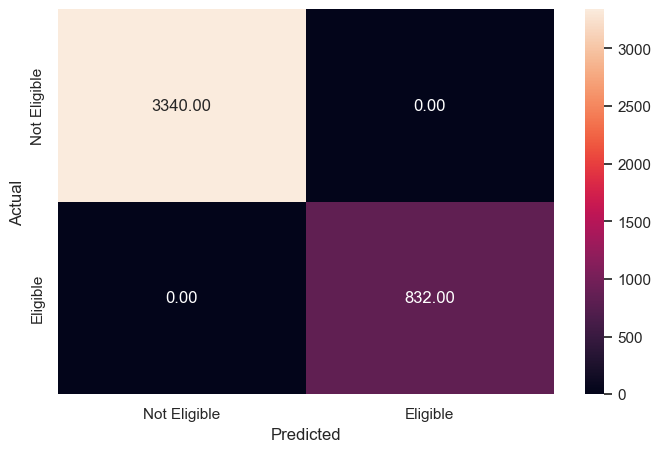

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1431
           1       0.82      0.67      0.74       357

    accuracy                           0.90      1788
   macro avg       0.87      0.82      0.84      1788
weighted avg       0.90      0.90      0.90      1788



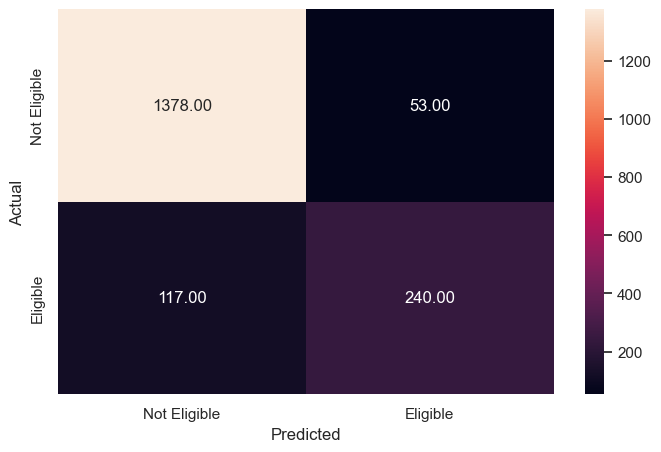

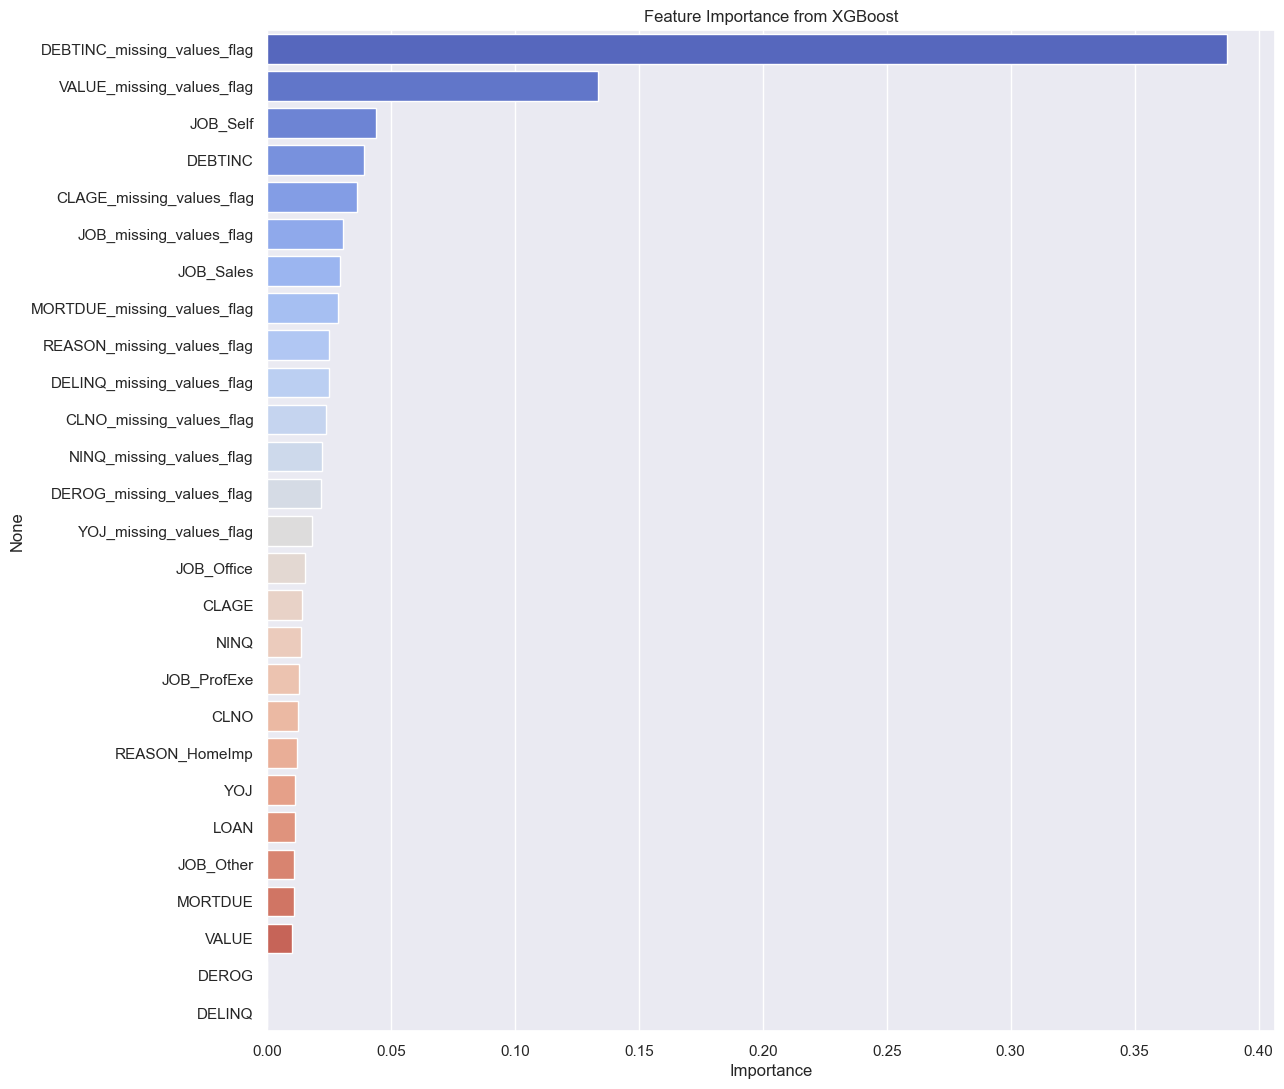

In [347]:
# Checking performance on the training data
y_pred_train_xgb = xgb_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_xgb)

# Checking performance on the test data
y_pred_test_xgb = xgb_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_xgb)

# Checking feature importance
importances = xgb_estimator_tuned.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=[
    'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x='Importance', y=importance_df.index,
            data=importance_df, palette='coolwarm')
plt.title('Feature Importance from XGBoost')
plt.show()

In [348]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Untuned XGBoost
y_train_pred_xgb = xgb_estimator_manual.predict(x_train)
y_test_pred_xgb = xgb_estimator_manual.predict(x_test)

# Tuned XGBoost
y_train_pred_xgb_tuned = xgb_estimator_tuned.predict(x_train)
y_test_pred_xgb_tuned = xgb_estimator_tuned.predict(x_test)

In [349]:
# Append to accuracy
acc_train.append(accuracy_score(y_train, y_train_pred_xgb))
acc_test.append(accuracy_score(y_test, y_test_pred_xgb))
acc_train.append(accuracy_score(y_train, y_train_pred_xgb_tuned))
acc_test.append(accuracy_score(y_test, y_test_pred_xgb_tuned))

# Append to recall
recall_train.append(recall_score(y_train, y_train_pred_xgb))
recall_test.append(recall_score(y_test, y_test_pred_xgb))
recall_train.append(recall_score(y_train, y_train_pred_xgb_tuned))
recall_test.append(recall_score(y_test, y_test_pred_xgb_tuned))

# Append to precision
precision_train.append(precision_score(y_train, y_train_pred_xgb))
precision_test.append(precision_score(y_test, y_test_pred_xgb))
precision_train.append(precision_score(y_train, y_train_pred_xgb_tuned))
precision_test.append(precision_score(y_test, y_test_pred_xgb_tuned))

## Comparing Model Performances

In [350]:
def get_recall_score(model, flag=True, X_train=x_train, X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    a = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    a.append(train_recall)  # adding train recall to list
    a.append(test_recall)  # adding test recall to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Recall on training set : ",
              metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

    return a  # returning the list with train and test scores

In [351]:
# Function to calculate precision score
def get_precision_score(model, flag=True, X_train=x_train, X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    b.append(train_precision)  # adding train precision to list
    b.append(test_precision)  # adding test precision to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Precision on training set : ",
              metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ",
              metrics.precision_score(y_test, pred_test))

    return b  # returning the list with train and test scores

In [352]:
# Function to calculate accuracy score
def get_accuracy_score(model, flag=True, X_train=x_train, X_test=x_test):
    '''
    model : classifier to predict values of X

    '''
    c = []  # defining an empty list to store train and test results
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    c.append(train_acc)  # adding train accuracy to list
    c.append(test_acc)  # adding test accuracy to list

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))

    return c  # returning the list with train and test scores

In [354]:
# Making the list of all the model names 

#models = [lg, dt, dtree_estimator, rf_estimator, rf_estimator_tuned]
models = [rf_estimator_tuned, rf_estimator, dtree_estimator,
          dt, xgb_estimator_manual, xgb_estimator_tuned,]


# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    
     # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

In [355]:
# Mentioning the Model names in the list.
comparison_frame = pd.DataFrame({'Model': ['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree', 'XGboost', 'Tuned XGboost'],
                                 'Train_Accuracy': acc_train,
                                 'Test_Accuracy': acc_test,
                                 'Train_Recall': recall_train,
                                 'Test_Recall': recall_test,
                                 'Train_Precision': precision_train,
                                 'Test_Precision': precision_test})
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0  Tuned Random Forest        1.000000       0.888143      1.000000   
1        Random Forest        1.000000       0.893177      1.000000   
2  Tuned Decision Tree        0.860978       0.854027      0.796875   
3        Decision Tree        1.000000       0.856264      1.000000   
4              XGboost        0.998322       0.903244      1.000000   
5        Tuned XGboost        1.000000       0.904922      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
0     0.644258         1.000000        0.759076  
1     0.644258         1.000000        0.782313  
2     0.759104         0.617318        0.607623  
3     0.588235         1.000000        0.656250  
4     0.717087         0.991657        0.780488  
5     0.672269         1.000000        0.819113

## Insights:

1. Highest Test Accuracy is observed in Tuned XGBoost and Random Forest models (~0.905), closely followed by Tuned Random Forest and XGBoost. These four models perform similarly on unseen data.

2. All models show overfitting to some degree, as evident from perfect or near-perfect training accuracy (1.0 or ~0.998) but a drop in test accuracy. However, Tuned Random Forest and XGBoost manage the trade-off better with slightly lower training accuracy, indicating a mild regularization effect.

3. Recall is 1.0 on the training set for all models, indicating they perfectly capture positives during training. But on the test set, recall ranges from ~0.64 to ~0.72. Tuned Random Forest and XGBoost show the highest test recall (~0.717), meaning they are slightly better at capturing true positives.

4. Precision is highest for Tuned XGBoost and Random Forest (~0.82), indicating fewer false positives. These models strike a better balance between capturing actual defaults (recall) and avoiding false alarms (precision).

5. Overall, Tuned XGBoost and Random Forest provide the best combination of high accuracy, high precision, and decent recall, making them strong candidates for deployment in a loan default prediction setting.